In [1]:
import statsmodels.api as sm 
import sqlite3
import pickle
import codecs
import otree
import binascii
import os,sys
import math
module_path = os.path.abspath(os.path.join('../otree-halluc/'))

if module_path not in sys.path:
    sys.path.append(module_path)
from otree import settings

In [20]:
figs_folder="../figs_hallu/us2_"
def save_plot(name_plot,aplot=None):
    if aplot is None :
        aplot=plt
    
    plt.savefig(figs_folder+name_plot+'.png', format="png", bbox_inches="tight")

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport

module_path = os.path.abspath(os.path.join('../../../tau_thesis_tools/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import logging
import seaborn as sns
from data_analysis import OtreeCleaning

/Users/olivierkamoun/envs/tau_thesis_tools/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# General settings

In [4]:
sns.set(style="whitegrid")

In [5]:
default_temo = 0.7

## tools

In [6]:
def clean_to_str(c):

    if isinstance(c,str) or pd.isna(c):
        return c
    else :
        return str(int(c))

#  load data

### load from database bot results

In [7]:
sql_string = "/Users/olivierkamoun/PycharmProjects/otree_projects_thesis/hallucinations/otree-halluc/db.sqlite3"

In [8]:
sessions_dict= {'sg2kcvtx': 'html 7p 500',
                'hjihlc42' : 'dialog 7p 500', 
                't6w29g63' : 'dialog 7p temp0 500',
                'p3ye3adz':'html 7p temp0 500',
                'qq8zwn0n':'html 5p 500',
                'im2lfk2t': 'dialog 7p 800'
                
                }
sessions_dict2={
      'ynf8vze4':'dialog 5p 500',
      '9dzxqrgh':'dialog 5p temp0 500'}
               
#                '9ztn0j6p':'html temp 0 5'}
#                '2bag9dcs':'dialog  temp0 bis',

### Define list of sessions to analyse

In [9]:
sessions= list(sessions_dict.keys())
otc=OtreeCleaning(session_configs=sessions,sql_string=sql_string )
otc2=OtreeCleaning(session_configs=list(sessions_dict2.keys()),sql_string=sql_string )


sessions_df,df =otc.load_sql()
sessions_df2,df2 =otc2.load_sql()

print(f'df loaded {len(df)} run for {len(sessions_df)} sessions ')
print(f'df2 loaded {len(df2)} run for {len(sessions_df2)} sessions ')


df loaded 3300 run for 6 sessions 
df2 loaded 1000 run for 2 sessions 


# add sub samples

In [10]:
df=otc.treatment_order_response()
df=otc.categories_to_numeric()
df2=otc2.treatment_order_response()
df2=otc2.categories_to_numeric()
df =pd.concat([df,df2])
sessions_df = pd.concat([sessions_df,sessions_df2])
sessions_dict.update(sessions_dict2)
old_df = df 
old_session_df = sessions_df

In [11]:
'123454'[:-2]

'1234'

In [12]:
old_sessions_dict = sessions_dict.copy()


def add_sample(df,sessions_df,old_session,new_size):
    new=df[df['_session_code']==old_session].head(new_size)
    news_s= f'{old_session}_{new_size}'
    new['_session_code']=news_s
    
    new_sdf=sessions_df.loc[[old_session]]
    new_sdf['code'] = news_s
    new_sdf.index=[news_s]
    new_label = sessions_dict[old_session][:-3]+' '+ str(new_size)
    if new_label not in sessions_dict.values():
        sessions_dict[news_s]=new_label
        df=  pd.concat([df,new])
        sessions_df = pd.concat([sessions_df,new_sdf])
        print (f' added {news_s} new total {len(df)}')
    return df, sessions_df

for s in old_sessions_dict:
    df, sessions_df = add_sample(df, sessions_df,s,100)
    

sessions_dict

 added sg2kcvtx_100 new total 4400
 added hjihlc42_100 new total 4500
 added t6w29g63_100 new total 4600
 added p3ye3adz_100 new total 4700
 added qq8zwn0n_100 new total 4800
 added ynf8vze4_100 new total 4900
 added 9dzxqrgh_100 new total 5000


{'sg2kcvtx': 'html 7p 500',
 'hjihlc42': 'dialog 7p 500',
 't6w29g63': 'dialog 7p temp0 500',
 'p3ye3adz': 'html 7p temp0 500',
 'qq8zwn0n': 'html 5p 500',
 'im2lfk2t': 'dialog 7p 800',
 'ynf8vze4': 'dialog 5p 500',
 '9dzxqrgh': 'dialog 5p temp0 500',
 'sg2kcvtx_100': 'html 7p  100',
 'hjihlc42_100': 'dialog 7p  100',
 't6w29g63_100': 'dialog 7p temp0  100',
 'p3ye3adz_100': 'html 7p temp0  100',
 'qq8zwn0n_100': 'html 5p  100',
 'ynf8vze4_100': 'dialog 5p  100',
 '9dzxqrgh_100': 'dialog 5p temp0  100'}

In [13]:
item_col=list(df.columns)
len(item_col)

128

In [14]:
df['full']=df['_max_page_index']<=df['_index_in_pages']
df['session.code']=df['_session_code']
df=df.sort_values("_created")

In [15]:
df[['_session_code','full','_created']].groupby("_session_code").mean().sort_values('_created').style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) 

,FULL,_CREATED
_session_code,,
sg2kcvtx,"0,796","1.716.106.964,252"
sg2kcvtx_100,"0,790","1.716.106.964,252"
hjihlc42,"0,966","1.716.112.811,794"
hjihlc42_100,"0,960","1.716.112.811,794"
t6w29g63,"0,996","1.716.148.944,384"
t6w29g63_100,"1,000","1.716.148.944,384"
p3ye3adz,"0,890","1.716.203.231,920"
p3ye3adz_100,"0,920","1.716.203.231,920"
9dzxqrgh,"1,000","1.716.240.650,197"


In [16]:
set(df['session.code'])

{'9dzxqrgh',
 '9dzxqrgh_100',
 'hjihlc42',
 'hjihlc42_100',
 'im2lfk2t',
 'p3ye3adz',
 'p3ye3adz_100',
 'qq8zwn0n',
 'qq8zwn0n_100',
 'sg2kcvtx',
 'sg2kcvtx_100',
 't6w29g63',
 't6w29g63_100',
 'ynf8vze4',
 'ynf8vze4_100'}

In [17]:
df['last_page'] = [f"{v[0]}_{v[1]}"  for i,v in df[['_index_in_pages','_current_page_name']].iterrows() ]
page_anal=pd.crosstab(values=df['_is_bot'],index=df['_session_code'],columns=df['last_page'],aggfunc='count',normalize='index')

page_anal=page_anal.fillna(0)

# use time sort :
page_anal = page_anal.loc[sessions_df.index]

In [18]:
def nice_session_label(s):
    if s in sessions_dict :
        if '_' in sessions_dict[s]:
            return ' '.join(sessions_dict[s].split('_')[1:])
        else :
            return sessions_dict[s]
    return s


FileNotFoundError: [Errno 2] No such file or directory: '../figs_hallu/us2_page_progess.png'

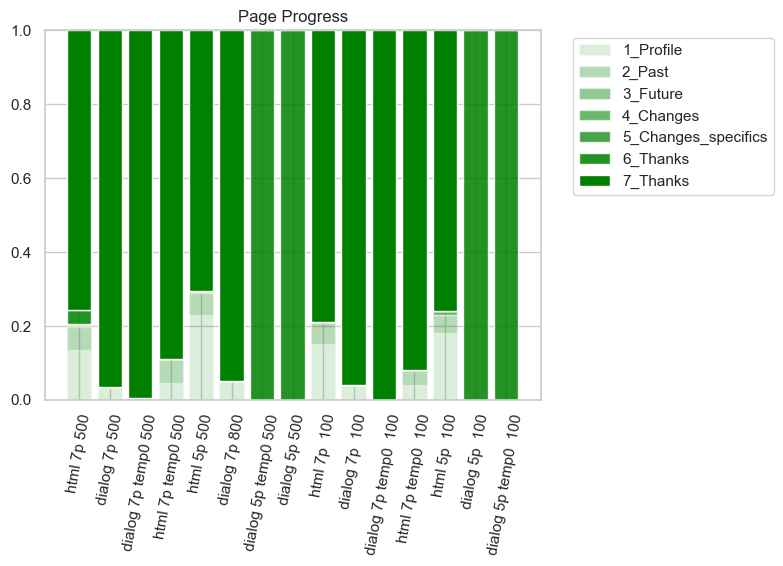

In [21]:
bottom=[]
def alpha_p (p):
    return int(p.split('_')[0])/7
for p in page_anal.columns:
    if len(bottom) == 0 :
        plt.bar(page_anal.index, page_anal[p], label=p, alpha=alpha_p(p),color='green')
        bottom=page_anal[p]
    else:
        plt.bar(page_anal.index, page_anal[p], bottom = bottom , label=p,alpha=alpha_p(p),color='green')
        bottom=page_anal[p] + bottom
        

x_lab=[nice_session_label(l) for l in page_anal.index]
x_pos= np.arange(len(page_anal))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Page Progress')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"page_progess.png", format="png", bbox_inches="tight")
plt.show()

## Load original data

In [ ]:


file_ref_profile="/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/us_court_survey/us_survey_raw_70.csv"


In [ ]:
#get profile file per session
sessions_df['profile_file']=[ c.get('profile_file',file_ref_profile) for c in sessions_df['config_dict']]


In [ ]:
session_participant_dict={}
case_id_list=[]
distinct_original={}
for s in sessions_df.index:
    fn =  sessions_df.loc[s]['profile_file']
    ref_profile_df=pd.read_csv(fn)
    ref_profile_df['age']=2020-ref_profile_df['birthyr']
    p_list= df[df['session.code']==s][['code_2','id_in_session'] ].to_dict(orient='index')
    c_list = ref_profile_df['caseid'][:len(p_list)]
    s_dict={p['code_2']:ref_profile_df['caseid'][p['id_in_session']-1]  for i,p in p_list.items()}
    session_participant_dict[s]=s_dict
    case_id_list = case_id_list + list(c_list)
    name = f'original {len(c_list)}'
    k= fn+name 
    if k not in distinct_original and len(c_list)<1000 :
        distinct_original[k]={'len':len(c_list),'name':name,'caseis_list':list(c_list) }
        print (distinct_original[k])

        

{'len': 500, 'name': 'original 500', 'caseis_list': [1032326091, 1030827483, 1039977991, 1032308637, 1031879237, 1030417127, 1037784917, 1029951241, 1041003959, 1037672619, 1030205683, 1041006215, 1037446177, 1036448329, 1039357173, 1031568835, 1036726049, 1038581481, 1028831691, 1031929901, 1031327491, 1033707299, 1038030043, 1033981091, 1041007253, 1044119551, 1030536363, 1039978277, 1030537507, 1035342335, 1030954519, 1030716477, 1031812799, 1031135725, 1030096585, 1041014977, 1041015677, 1037126459, 1037329677, 1037446463, 1030506599, 1037328839, 1031410283, 1039978109, 1030960163, 1031063343, 1037302877, 1030537039, 1041006203, 1034921987, 1037192327, 1034231051, 1036985463, 1039977505, 1028885225, 1028316861, 1031428179, 1030565357, 1030562415, 1039978417, 1031073143, 1031633631, 1037384055, 1039134459, 1030460815, 1030620471, 1037693569, 1029175781, 1030180757, 1033219873, 1031331961, 1028565561, 1036274011, 1044118783, 1031758615, 1031386723, 1031623167, 1041015261, 1031132459,

In [ ]:
file_raw_original="/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/us_court_survey/CCES19_IUA_OUTPUT.xlsx"
raw_original_df=pd.read_excel(file_raw_original)
raw_original_df['age']=2020-raw_original_df['birthyr']
distinct_original['original']={'len':len(raw_original_df),'name':'original','caseis_list':list(raw_original_df['caseid']) }

In [ ]:
raw_original_df_selected=raw_original_df.set_index('caseid').loc[case_id_list].reset_index()

In [ ]:

match_columns_file="/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/us_court_survey/match_columns.csv"
match_columns_df=pd.read_csv(match_columns_file)
match_columns_dict=match_columns_df.set_index('col_ref').to_dict(orient='index')


### Reform original data into new bot format

In [ ]:
item_ref_dict=raw_original_df[['caseid']+list(match_columns_df['col_ref'])].to_dict()


In [ ]:

new_data={'caseid':item_ref_dict['caseid']}
new_data['influence_type']={}
for c in item_ref_dict:
    if c in match_columns_dict :
                newc = match_columns_dict[c]['col_new']
                if not(pd.isna(match_columns_dict[c]['future_past'] )):
                        tf_col = 'time_frame_'+match_columns_dict[c]['future_past'] 
                else :
                     tf_col=None
                if newc not in new_data: 
                    
                    new_data[newc]= {i:pd.NA for i in item_ref_dict[c]}
                    if tf_col is not None and tf_col not in new_data :
                             new_data[tf_col]={i:pd.NA for i in  item_ref_dict[c]}

                for i,v in item_ref_dict[c].items():
                    if not(pd.isna( v )) and v not in [9,99,98]:
                        if pd.isna(new_data[newc][i]) or new_data[newc][i]==0 or new_data[newc][i]==9 :
                            if tf_col is not None :
                                  new_data[tf_col][i]=match_columns_dict[c]['time_frame'] 
                                  if not(pd.isna(match_columns_dict[c]['criteria'] )) :
                                        new_data['influence_type'][i]= match_columns_dict[c]['criteria']
                            new_data[newc][i]=item_ref_dict[c][i]
                        else :
                            print(f"value conlict {i} {new_data[newc][i]} {item_ref_dict[c][i]}")
    else :
         print(f'{c} not in list')
original_df = pd.DataFrame.from_dict(new_data)




caseid not in list


In [ ]:
num_cols =[c for c in item_col if '_num' in c and not(c.startswith('_'))] +['age']
num_cols

['round_number',
 'sex_num',
 'educ_num',
 'political_ide_num',
 'political_aff_num',
 'political_gov_sup_num',
 'religion_num',
 'next_election_num',
 'status_num',
 'ownhome_num',
 'influence_society_num',
 'influence_like_you_num',
 'future_influence_society_num',
 'future_like_you_num',
 'changes_num',
 'change_term_num',
 'change_selection_num',
 'change_size_num',
 'future_influence_society_treated_num',
 'future_like_you_treated_num',
 'age']

In [ ]:
all_app=df
bot_and_orig_df =all_app
for orig_f in  distinct_original:
    sub_orig= original_df.set_index('caseid').loc[distinct_original[orig_f]['caseis_list']]
    sub_orig['session.code']=distinct_original[orig_f]['name']
    bot_and_orig_df= pd.concat([bot_and_orig_df,sub_orig],axis=0)
for c in num_cols :
    bot_and_orig_df[c] = pd.to_numeric(bot_and_orig_df[c])
bot_and_orig_df['nice_session']=[nice_session_label(s) for s in bot_and_orig_df['session.code']]
sessions_and_orig_list = set(bot_and_orig_df['session.code'])

In [ ]:
#original_df_reduced = original_full_df.set_index('caseid').loc[ref_profile_df['caseid']]
#report = ProfileReport(original_df_reduced)
#hrep=report.to_file("/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/court_survey/reports/us_original_red.html")

In [ ]:

#report = ProfileReport(original_df)
#hrep=report.to_file("/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/court_survey/reports/us_original.html")

<Axes: xlabel='_session_code'>

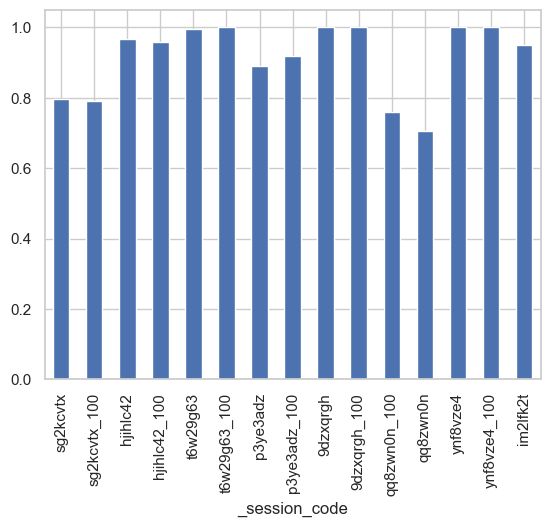

In [ ]:
sum_mean=df.groupby("_session_code").mean(numeric_only=True).sort_values('_created')
sum_mean['full'].plot.bar()

In [ ]:
item_col_cat = [c for c in item_col if 'open_ended' not in c and c not in ['court_decision']]
item_col_cat

['sex',
 'educ',
 'age',
 'race',
 'political_ide',
 'political_us_ide',
 'political_aff',
 'political_gov_sup',
 'religion',
 'non_jews_religiosity',
 'jews_religiosity',
 'next_election',
 'status',
 'profile_id',
 'residence',
 'ownhome',
 'influence_society',
 'influence_like_you',
 'future_influence_society',
 'future_like_you',
 'time_frame_past',
 'time_frame_future',
 'specific_decision',
 'influence_type',
 'changes',
 'court_knowledge',
 'court_interest',
 'court_interst_since',
 'next_election_2',
 'change_term',
 'change_selection',
 'change_size',
 'court_decision_2',
 'pages_excluded',
 'round_number',
 'id_in_group',
 'id',
 '_vars',
 'config',
 'label',
 'code',
 'mturk_HITId',
 'mturk_HITGroupId',
 'is_mturk',
 'mturk_use_sandbox',
 'mturk_expiration',
 'mturk_qual_id',
 'archived',
 'comment',
 '_anonymous_code',
 'is_demo',
 '_admin_report_app_names',
 '_admin_report_num_rounds',
 'num_participants',
 '_created',
 'id_2',
 '_vars_2',
 'session_id',
 'label_2',
 'id_i

## analysis all variables 

In [ ]:
if 1==2 :
    for c in item_col_cat:
        try:
            tab_nb= pd.crosstab(index=all_app['session.code'],columns=all_app[c],normalize='index')
            min_set = min([len(set([i for i in l if i!=0])) for i,l in tab_nb.iterrows()])
            if min_set<2 or min_set>20 or len(tab_nb.columns)>20:
                print(f'not drawing for  col {c}')
            else :
                print(f'not drawing for  col {c} {len(tab_nb)} {len(tab_nb.columns)} {min_set}')
                tab_nb.plot.bar(stacked=True)
                plt.show()
        except Exception as e:
            print(f'cannot draw col {c}')

## other ananlyis

In [ ]:
page_anal

last_page,1_Profile,2_Past,3_Future,4_Changes,5_Changes_specifics,6_Thanks,7_Thanks
sg2kcvtx,0.136,0.062,0.002,0.002,0.002,0.038,0.758
hjihlc42,0.032,0.000,0.002,0.000,0.000,0.000,0.966
t6w29g63,0.004,0.000,0.000,0.000,0.000,0.000,0.996
p3ye3adz,0.046,0.064,0.000,0.000,0.000,0.000,0.890
qq8zwn0n,0.230,0.058,0.004,0.002,0.000,0.000,0.706
im2lfk2t,0.050,0.000,0.000,0.000,0.000,0.000,0.950
9dzxqrgh,0.000,0.000,0.000,0.000,0.000,1.000,0.000
ynf8vze4,0.000,0.000,0.000,0.000,0.000,1.000,0.000
sg2kcvtx_100,0.150,0.060,0.000,0.000,0.000,0.000,0.790
hjihlc42_100,0.040,0.000,0.000,0.000,0.000,0.000,0.960


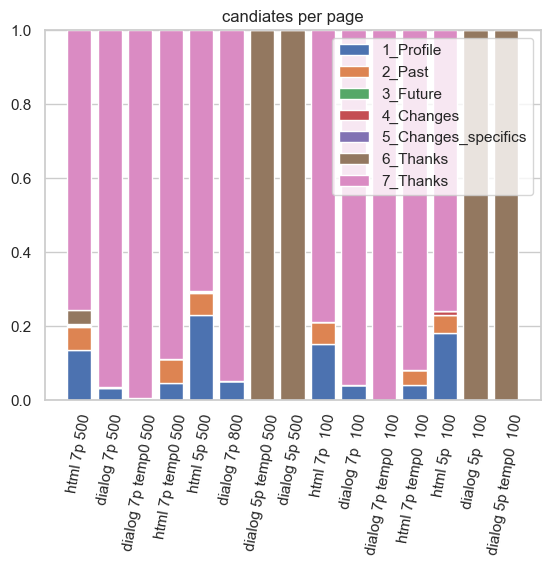

In [ ]:
bottom=[]

for p in page_anal.columns:
    if len(bottom) == 0 :
        plt.bar(page_anal.index, page_anal[p], label=p)
        bottom=page_anal[p]
    else:
        plt.bar(page_anal.index, page_anal[p], bottom = bottom , label=p)
        bottom=page_anal[p] + bottom
        

x_lab=[nice_session_label(l) for l in page_anal.index]
x_pos= np.arange(len(page_anal))
plt.legend()
plt.title('candiates per page')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"tmp.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:
rev_cols =[c for c in item_col if '_rev' in c] 
rev_cols

['sex_rev',
 'educ_rev',
 'political_ide_rev',
 'political_aff_rev',
 'political_gov_sup_rev',
 'religion_rev',
 'next_election_rev',
 'status_rev',
 'ownhome_rev',
 'influence_society_rev',
 'influence_like_you_rev',
 'future_influence_society_rev',
 'future_like_you_rev',
 'changes_rev',
 'change_term_rev',
 'change_selection_rev',
 'change_size_rev',
 'future_influence_society_treated_rev',
 'future_like_you_treated_rev']

for s in sessions :
    file_rep_name= "/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/court_survey/reports/bot"+s +".html"
    if os.path.exists(file_rep_name):
        print (f"report {file_rep_name} already exists ")
    else :
        print (f"generating reprot {file_rep_name}  ")
        #report = ProfileReport(all_app[all_app['session.code']==s][rev_cols])
        #hrep=report.to_file(file_rep_name)

<Axes: >

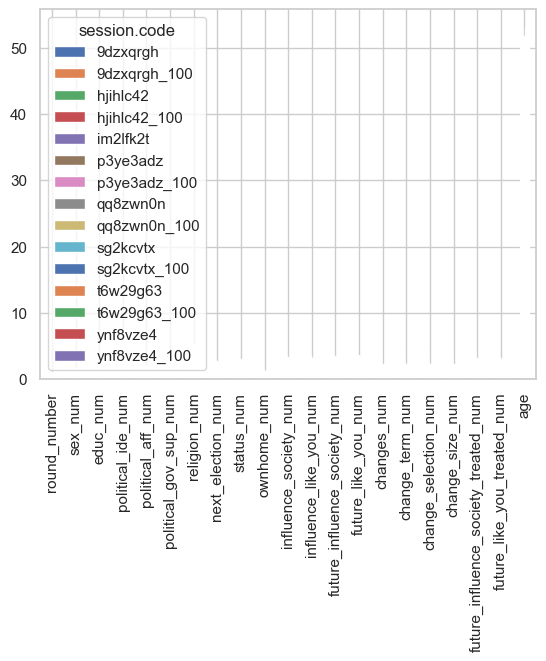

In [ ]:
sum_by_session=all_app.groupby('session.code')[num_cols].mean()
sum_by_session.transpose().plot.bar()

In [ ]:
def clean_cov_mat(data,cols=None):
    if cols is None :
        cols= data.columns
    cov_mat={}
    for cx in cols:
        cov_matx={}
        for cy in cols:
    
            if cx==cy :
                cov_tab=1
            else:
                x= data[cx][(-pd.isna(data[cx]))&((-pd.isna(data[cy])))]
                y= data[cy][(-pd.isna(data[cx]))&((-pd.isna(data[cy])))]    
               
                res=np.corrcoef(x,y)     
            
                cov_tab=res[1][0]
            cov_matx[cy]=cov_tab
        cov_mat[cx]=cov_matx
    return pd.DataFrame.from_dict(cov_mat)

In [ ]:

common_num_col= [c  for c in num_cols if c in original_df.columns]
common_num_col

['sex_num',
 'educ_num',
 'political_aff_num',
 'religion_num',
 'ownhome_num',
 'influence_society_num',
 'influence_like_you_num',
 'changes_num',
 'change_term_num',
 'change_selection_num',
 'change_size_num',
 'future_influence_society_treated_num',
 'future_like_you_treated_num',
 'age']

In [ ]:
cov_mat_df=clean_cov_mat(data=bot_and_orig_df[bot_and_orig_df['session.code']=='original'],cols=common_num_col)

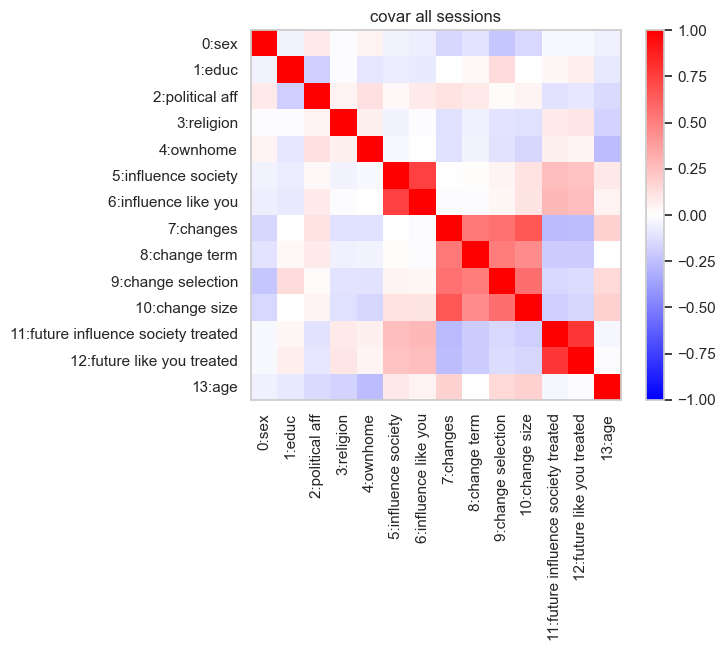

In [ ]:
def short_col_names(cols):
    new_cols=[]
    for i,n in enumerate(cols):
        if '_' in n:
            nn = ' '.join(n.split('_')[:-1])
        else :
            nn= n

        new_cols.append(str(i)+":"+nn)
    return new_cols
def color_map (cov_mat_df,interval=(-1,1),title="",ax=None):
    if ax is None :
        ax=plt
        use_plt=True
    else :
        use_plt=False
    
    ax.imshow(cov_mat_df,vmax=interval[1],vmin=interval[0], cmap='bwr')
   
    ax.grid(None)
    if use_plt:
        plt.title(title)
        plt.colorbar()
        plt.xticks(range(len(cov_mat_df.index)),short_col_names(cov_mat_df.index), rotation=90)
        plt.yticks(range(len(cov_mat_df.columns)),short_col_names(cov_mat_df.columns))
        plt.show()
        
    else :
        ax.set_title(title)
        
  


color_map(cov_mat_df,title='covar all sessions')



In [ ]:
def quick_p(x,y):
    if len(set(x))<2 :
        return 1
    x = sm.add_constant(x)
    model= sm.OLS(y,x).fit()

    T_test =model.t_test([0,1]) 
                
    p_tab=float(T_test.pvalue)
    return(p_tab)
def quick_e(x,y):
    if len(set(x))<2 :
        return 0
    x = sm.add_constant(x)
    model= sm.OLS(y,x).fit()
    T_test =model.t_test([0,1]) 
                
    p_tab=float(T_test.effect)
    return(p_tab)
def quick_correl(x,y):
    
    cx= x[(~pd.isna(x))&((~pd.isna(y)))]
    cy= y[(~pd.isna(x))&((~pd.isna(y)))]    
    if len(set(cx))<2 or len(set(cy))<2 :
        return 0    
    res=np.corrcoef(cx,cy)     
            
    cov_tab=res[1][0]
    return cov_tab 

In [ ]:
bot_and_orig_df['_is_bot'] = bot_and_orig_df['_is_bot'].fillna(0)

In [ ]:
def clean_tab(data,f,cols):
    p_mat={}

    for cx in cols:
        p_matx={}
        for cy in cols:

                x= data[cx][(~pd.isna(data[cx]))&((~pd.isna(data[cy])))]
                y= data[cy][(~pd.isna(data[cx]))&((~pd.isna(data[cy])))]  
                
                p_tab = f(np.float64(x),np.float64(y))
                p_matx[cy]=p_tab
        p_mat[cx]=p_matx
    return pd.DataFrame.from_dict(p_mat)



In [ ]:
correl_anal={}
func_list_dict = {'p':quick_p,'e':quick_e,'c':quick_correl}
for s in sessions_and_orig_list :
    print(s)
    sub_data=  bot_and_orig_df[bot_and_orig_df['session.code']==s]
    res_d = {}
    correl_anal[s]=res_d
    for nf, f in func_list_dict.items():
        res_d[nf]=  clean_tab(data=sub_data,f=f,cols=common_num_col)

p3ye3adz
9dzxqrgh_100
original
original 100
sg2kcvtx
p3ye3adz_100
qq8zwn0n_100
hjihlc42
qq8zwn0n
hjihlc42_100
original 500
original 800
ynf8vze4
ynf8vze4_100
im2lfk2t
t6w29g63
t6w29g63_100
sg2kcvtx_100
9dzxqrgh


<Axes: >

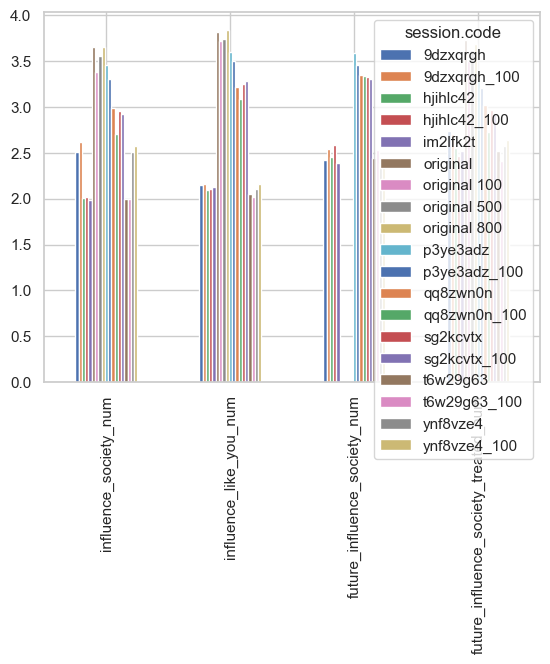

In [ ]:
col_list_gr= [ n for n in num_cols if 'influence' in n ]
mean_by_session=bot_and_orig_df.groupby('session.code')[ col_list_gr ].mean()
mean_by_session.transpose().plot.bar()

for g in correl_anal:
    color_map(correl_anal[g]['p'],interval=(0,.1),title =f'p test for {g} {sessions_dict.get(g,"")} ')


In [ ]:
def count_mat_below(m,l):
    n = len(m)
    c=0
    for i in range(1,n):
        
        for j in range(i):
            
            if m.iloc[i,j]<l:
                c+=1
    return c

def correl_by_session(correl_anal, nb_line = 4,value=['e','effect'],interval=(-0.5,0.5)):

    n=len(correl_anal)
    nb_by_line = n//nb_line +1
    fig, ax_tab = plt.subplots(nb_by_line, nb_line,sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle(f"{value[1]} in T-test for")
    sessions_nice_order = list(correl_anal.keys())
    sessions_nice_order.sort(key=lambda x: nice_session_label(x),reverse=True)
    for i,g in enumerate(sessions_nice_order):
       
        ax=ax_tab[i//nb_line , i%nb_line ]
        color_map(correl_anal[g][value[0]],interval=interval,title =f' {nice_session_label(g)} ',ax=ax)
    plt.savefig(figs_folder+f"corel_anal_matrix_{value[0]}.png", format="png", bbox_inches="tight")
    
correl_by_session(correl_anal, nb_line = 4)

In [ ]:
sign_pos_effect={s : ((correl_anal[s]['e']>0)  & (correl_anal[s]['p']<0.01  ))for s  in correl_anal}
sign_neg_effect={s : ((correl_anal[s]['e']<0)  & (correl_anal[s]['p']<0.01  ))for s  in correl_anal}
sign_effect ={s : (sign_pos_effect[s]+0)- (sign_neg_effect[s]+0 )  for s  in correl_anal}
((sign_effect[s]==sign_effect['original']) &(sign_effect[s]!=0)  ).sum().sum()

36

In [ ]:
nb_good_tab=pd.DataFrame.from_dict({s:{'nice_session':nice_session_label( s) ,'good_neg':  ((correl_anal[s]['e']<0)  & (correl_anal['original']['e']<0  )).sum().sum()} for s  in correl_anal}).transpose()
nb_good_tab['good_pos']= [((correl_anal[s]['e']>0)  & (correl_anal['original']['e']>0  )).sum().sum() for s  in correl_anal]
nb_good_tab['tot_goo_side']=nb_good_tab['good_neg']+nb_good_tab['good_pos']
nb_good_tab['good_p_001']= [(correl_anal[s]['p']<0.01).sum().sum()    for s  in correl_anal]

nb_good_tab['replic_succ']= [((sign_effect[s]==sign_effect['original']) &(sign_effect[s]!=0)  ).sum().sum() for s  in correl_anal]
nb_good_tab['hallucination']= nb_good_tab['good_p_001'] - nb_good_tab['replic_succ']

nb_good_tab.sort_values('replic_succ')


,nice_session,good_neg,good_pos,tot_goo_side,good_p_001,replic_succ,hallucination
t6w29g63_100,dialog 7p temp0 100,49,54,103,29,24,5
ynf8vze4_100,dialog 5p 100,12,40,52,28,28,0
original 100,original 100,70,90,160,35,33,2
hjihlc42_100,dialog 7p 100,58,64,122,36,34,2
9dzxqrgh_100,dialog 5p temp0 100,12,40,52,34,34,0
9dzxqrgh,dialog 5p temp0 500,12,40,52,40,36,4
ynf8vze4,dialog 5p 500,12,40,52,48,40,8
qq8zwn0n_100,html 5p 100,46,90,136,87,45,42
sg2kcvtx_100,html 7p 100,30,82,112,88,46,42
p3ye3adz_100,html 7p temp0 100,51,78,129,90,48,42


Text(0.5, 1.0, 'Number of succesfull replications')

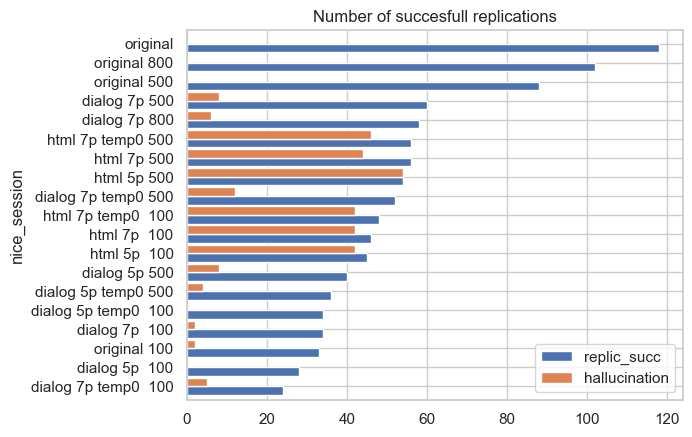

In [ ]:
nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session').plot.barh(width=.9)
plt.title('Number of succesfull replications')


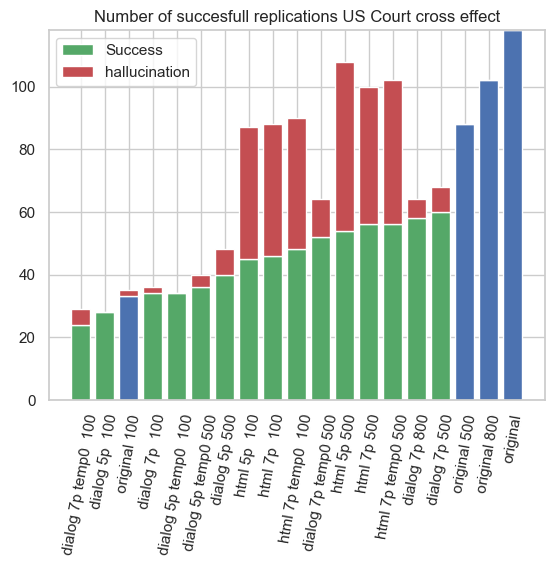

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group.png", format="png", bbox_inches="tight")

plt.savefig(figs_folder+"good_repli_by_session.png")
plt.show()

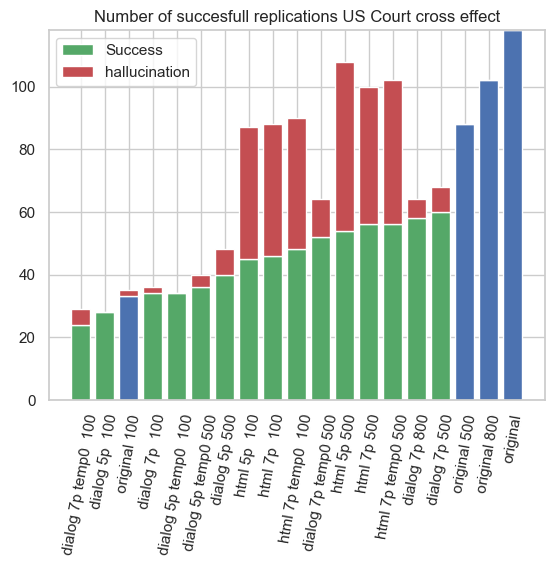

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group.png", format="png", bbox_inches="tight")

plt.savefig(figs_folder+"good_repli_by_session.png")
plt.show()

In [ ]:
nb_good_tab_s.index 

Index(['dialog 7p temp0  100', 'dialog 5p  100', 'original 100',
       'dialog 7p  100', 'dialog 5p temp0  100', 'dialog 5p temp0 500',
       'dialog 5p 500', 'html 5p  100', 'html 7p  100', 'html 7p temp0  100',
       'dialog 7p temp0 500', 'html 5p 500', 'html 7p 500',
       'html 7p temp0 500', 'dialog 7p 800', 'dialog 7p 500', 'original 500',
       'original 800', 'original'],
      dtype='object', name='nice_session')

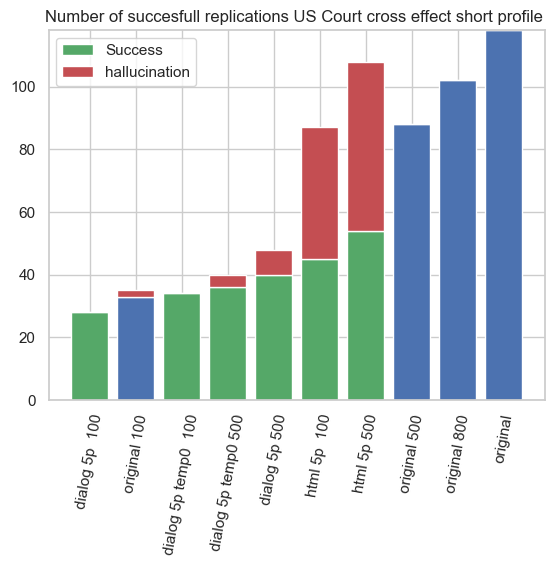

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')
list_to_plot = [s for s in nb_good_tab_s.index if '5p'  in s or 'orig' in s]
nb_good_tab_s =nb_good_tab_s.loc[list_to_plot]


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect short profile ')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group_5p.png", format="png", bbox_inches="tight")

plt.show()

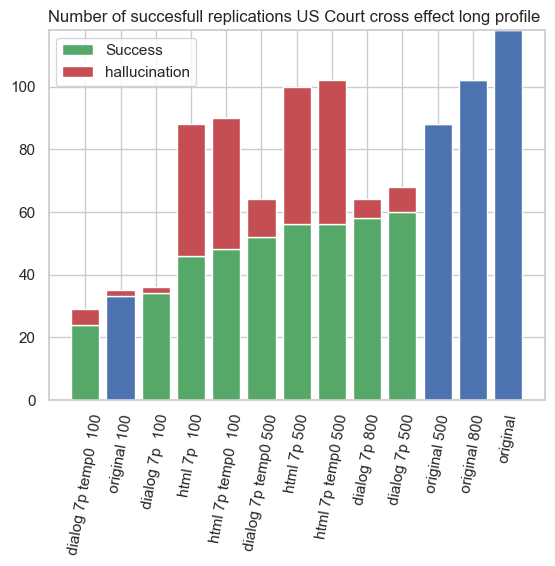

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')
list_to_plot = [s for s in nb_good_tab_s.index if '5p'  not in   s or 'orig' in s]
nb_good_tab_s =nb_good_tab_s.loc[list_to_plot]


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect long profile ')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group.png", format="png", bbox_inches="tight")

plt.show()

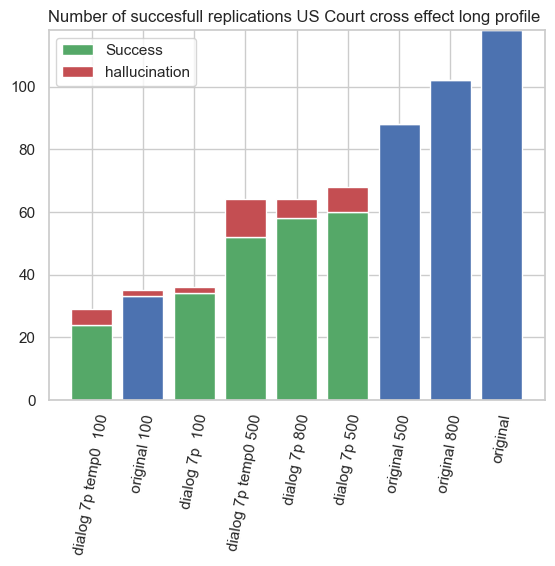

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')
list_to_plot = [s for s in nb_good_tab_s.index if ('dial'   in s and  '7p'   in  s) or 'orig' in s]
nb_good_tab_s =nb_good_tab_s.loc[list_to_plot].sort_values('replic_succ')[['replic_succ','hallucination']]


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect long profile ')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group.png", format="png", bbox_inches="tight")

plt.show()

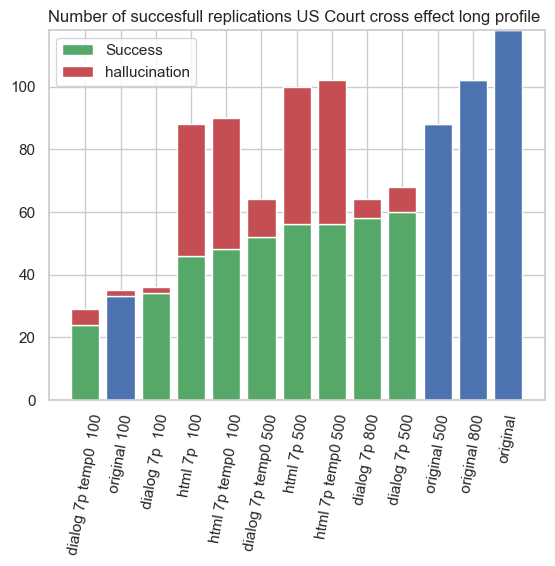

In [ ]:
nb_good_tab_s = nb_good_tab.sort_values('replic_succ')[['replic_succ','hallucination','nice_session']].set_index('nice_session')
list_to_plot = [s for s in nb_good_tab_s.index if '5p'  not in   s or 'orig' in s]
nb_good_tab_s =nb_good_tab_s.loc[list_to_plot].sort_values('replic_succ')[['replic_succ','hallucination']]


x_lab = [f"{c}" for c in nb_good_tab_s.index]
x_pos= np.arange(len(x_lab))
def name_to_col(x):
    if 'orig' in x :
        return 'b'
    return 'g'
col_tab=[name_to_col(c) for c in x_lab]
plt.bar(x_pos , nb_good_tab_s['replic_succ'], color=col_tab,label='Success')
plt.bar(x_pos , nb_good_tab_s['hallucination'],  bottom=nb_good_tab_s['replic_succ'], color='r',label='hallucination')
plt.legend()
plt.title('Number of succesfull replications US Court cross effect long profile ')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"succes_run_by_group.png", format="png", bbox_inches="tight")

plt.show()

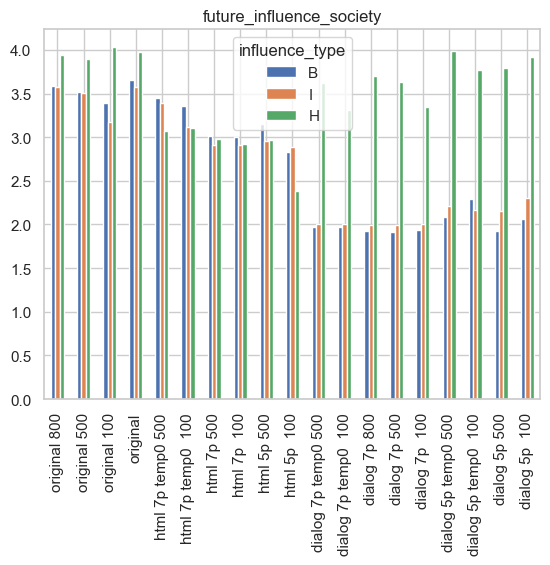

In [ ]:
sum_tab= pd.crosstab(index=bot_and_orig_df['influence_type'],columns=bot_and_orig_df['session.code'],values=bot_and_orig_df['future_influence_society_treated_num'],aggfunc='mean')

sum_tab=sum_tab.loc[['B','I','H']]
sum_tab.columns=[nice_session_label(c) for c in sum_tab.columns]
sum_tab.transpose().sort_index(ascending=False).plot.bar(title='future_influence_society')
plt.savefig(figs_folder+"BIH_Treatment_society.png")

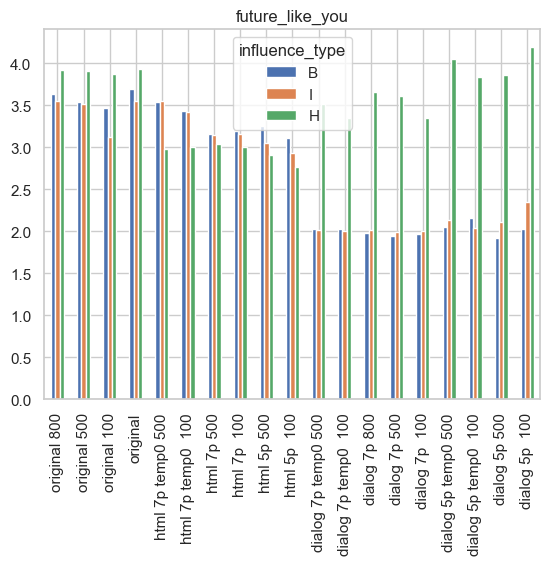

In [ ]:
sum_tab= pd.crosstab(index=bot_and_orig_df['influence_type'],columns=bot_and_orig_df['session.code'],values=bot_and_orig_df['future_like_you_treated_num'],aggfunc='mean')

sum_tab=sum_tab.loc[['B','I','H']]
sum_tab.columns=[nice_session_label(c) for c in sum_tab.columns]
sum_tab.transpose().sort_index(ascending=False).plot.bar(title='future_like_you')
plt.savefig(figs_folder+"BIH_Treatment_like_you.png")

## color map by treatment

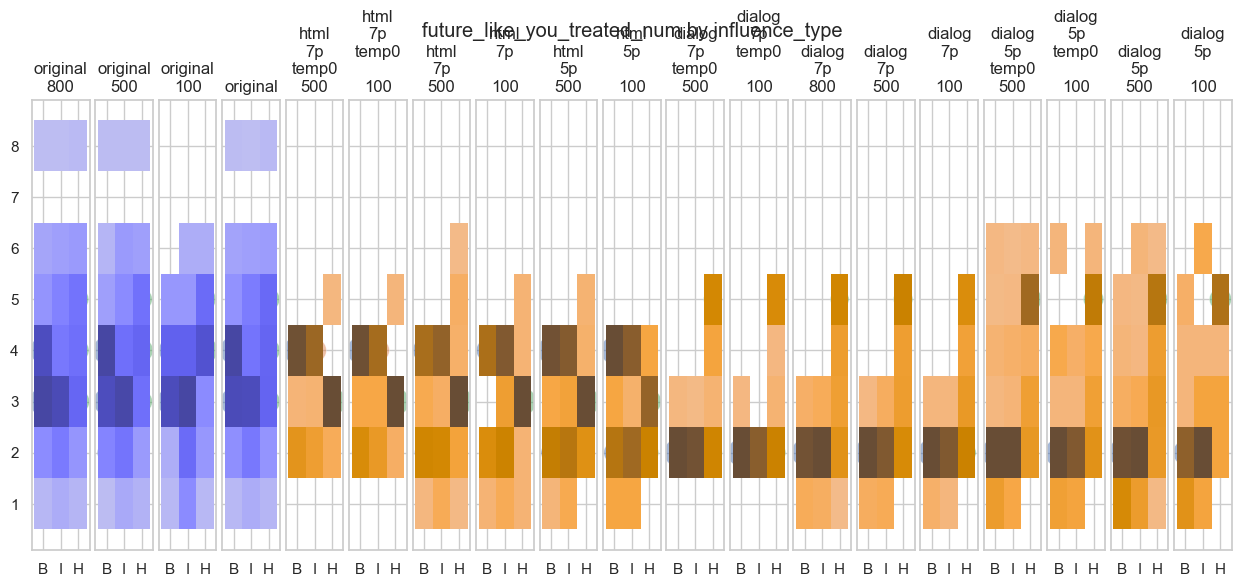

In [ ]:
def histo_by_treatment_and_session(data,c,treatment='influence_type',order=['B','I','H'],type="BP"):
    slist = list(set(data['nice_session']))
    slist.sort(reverse=True)
    axn = 6 
    nb_line = 1 
    n=len(slist)
    fig, ax_tab = plt.subplots(nb_line,n,sharex=True,sharey=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.suptitle(f"{c} by {treatment}")
    data['treat']= [clean_to_str(c) for c in data[treatment]]
    for i,s in enumerate(slist):
        ax=ax_tab[i%n ]
        if 'B' in type :
            sns.boxplot(x='treat',y= c,data=data[data['nice_session']==s] ,order=order,ax=ax)
        if 'P' in type :
            point_data= data[data['nice_session']==s].groupby(['treat',c]).count()
            
            sns.scatterplot(x='treat', y=c,size='session.code', 
                    data=point_data.loc[order],sizes=(40,400), 
                    alpha=.5,hue='treat',ax=ax)
        if 'H' in type :
            if 'original' in s:
                color='blue'
            else :
                color='orange'
            sns.histplot(y=c,x='treat',data=data[data['nice_session']==s] ,ax=ax, discrete=(True, True),color=color)
        
        ax.legend([],[], frameon=False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_title(s.replace(' ','\n'))
    plt.subplots_adjust(wspace=0.1,hspace=0.2,left=0,top=0.85,right=1,bottom=0.1)   
    plt.savefig(figs_folder+"treatmenh_"+treatment+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
histo_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num',type='PH')

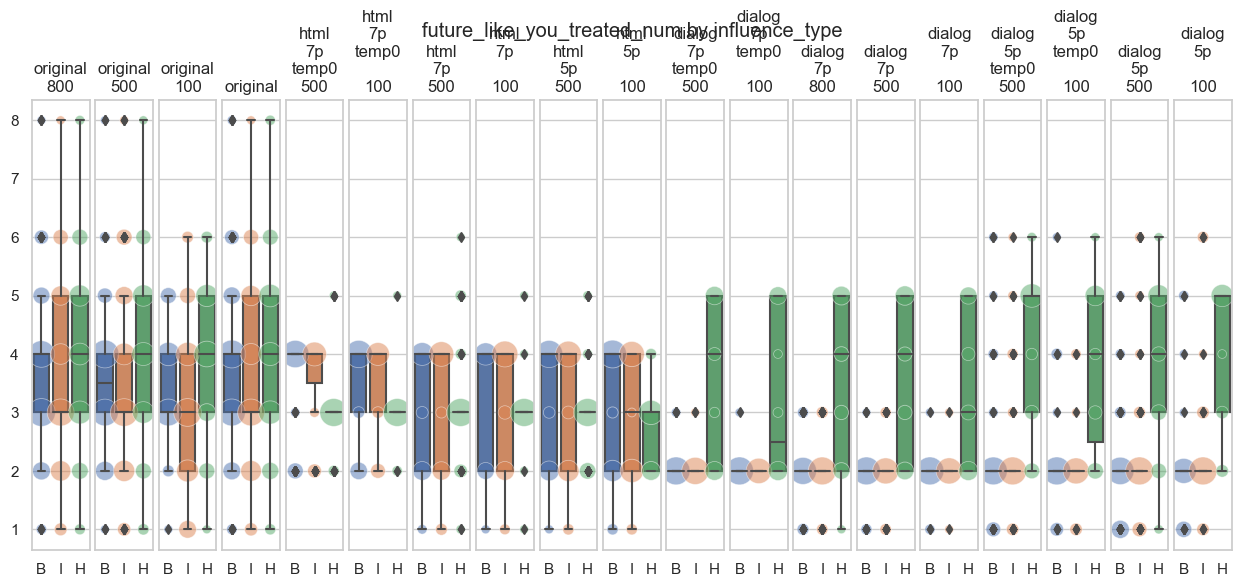

In [ ]:
def box_by_treatment_and_session(data,c,treatment='influence_type',order=['B','I','H'],type="BP"):
    slist = list(set(data['nice_session']))
    slist.sort(reverse=True)
    axn = 6 
    nb_line = 1 
    n=len(slist)
    fig, ax_tab = plt.subplots(nb_line,n,sharex=True,sharey=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.suptitle(f"{c} by {treatment}")
    data['treat']= [clean_to_str(c) for c in data[treatment]]
    for i,s in enumerate(slist):
        ax=ax_tab[i%n ]
        
        if 'B' in type :
            sns.boxplot(x='treat',y= c,data=data[data['nice_session']==s] ,order=order,ax=ax)
        if 'P' in type :
            point_data= data[data['nice_session']==s].groupby(['treat',c]).count()
            
            sns.scatterplot(x='treat', y=c,size='session.code', 
                    data=point_data.loc[order],sizes=(40,400), 
                    alpha=.5,hue='treat',ax=ax)
        
        ax.legend([],[], frameon=False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_title(s.replace(' ','\n'))
    plt.subplots_adjust(wspace=0.1,hspace=0.2,left=0,top=0.85,right=1,bottom=0.1)
    plt.savefig(figs_folder+"treatment_"+treatment+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
box_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num')

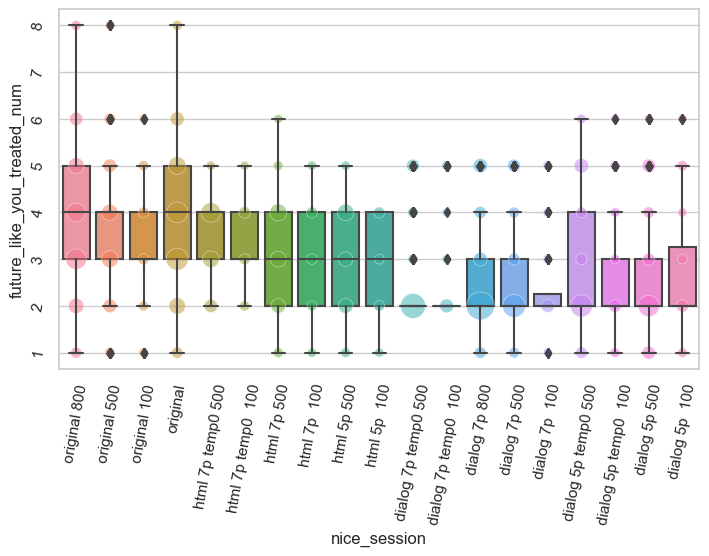

In [ ]:
def box_by_session(data,c,type="BP"):
    slist = list(set(data['nice_session']))
    slist.sort(reverse=True)
    

    
    if 'B' in type :
        sns.boxplot(x='nice_session',y= c,data=data , order =slist )
    if 'P' in type :
        point_data= data.groupby(['nice_session',c]).count()
        
        sns.scatterplot(x='nice_session', y=c,size='session.code', 
                data=point_data.loc[slist],sizes=(40,400), 
                alpha=.5,hue='nice_session')
    plt.legend([],[], frameon=False)
    plt.tick_params(labelrotation=80)
    plt.subplots_adjust(wspace=0.1,hspace=0.2,left=0,top=0.85,right=1,bottom=0.1)
    plt.savefig(figs_folder+"per_session"+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
box_by_session(bot_and_orig_df, 'future_like_you_treated_num',type='BP')

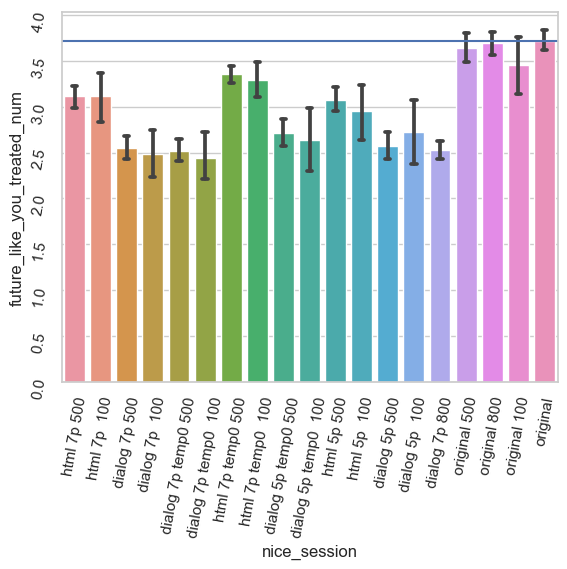

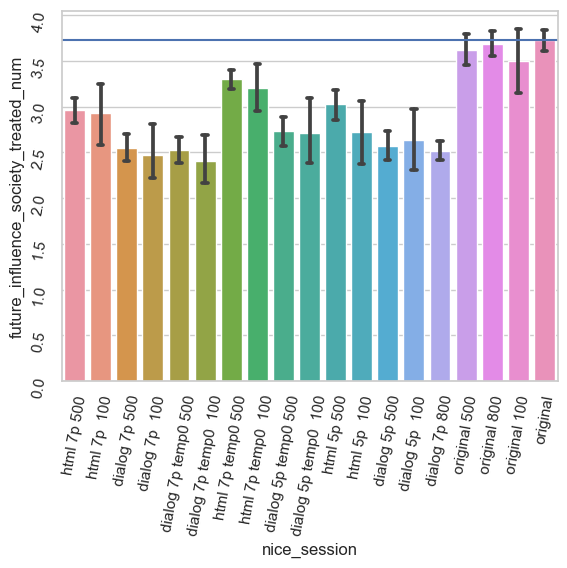

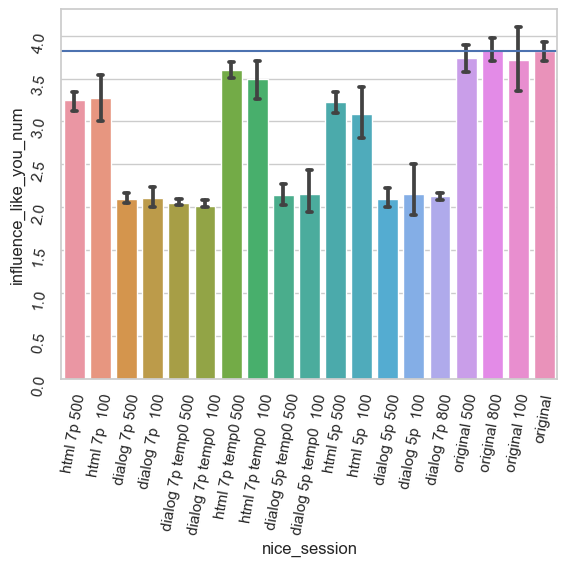

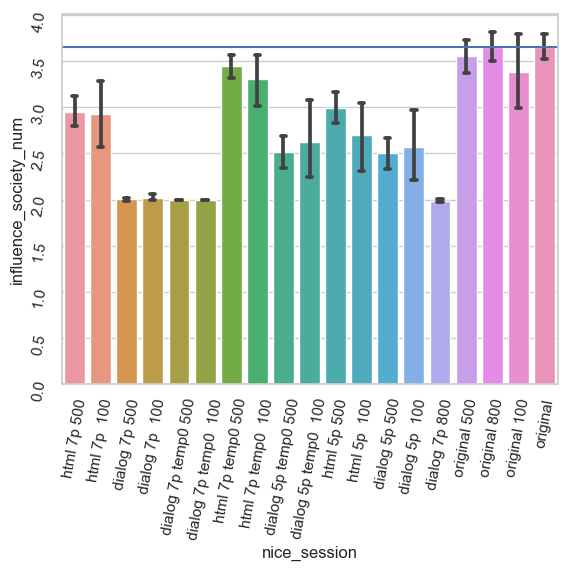

In [ ]:
def bar_by_session(data,c):
    data= data[~np.isnan(data[c])]
    sns.barplot(data=data,y=c,x='nice_session', estimator=np.mean, errorbar=('ci', 99), capsize=.2)
    plt.axhline(bot_and_orig_df[bot_and_orig_df['nice_session']=='original'][c].mean())
    plt.tick_params(labelrotation=80)
    plt.savefig(figs_folder+"per_session_mean"+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
bar_by_session(bot_and_orig_df,'future_like_you_treated_num')
bar_by_session(bot_and_orig_df,'future_influence_society_treated_num')
bar_by_session(bot_and_orig_df,'influence_like_you_num')
bar_by_session(bot_and_orig_df,'influence_society_num')


In [ ]:
slist=['original']+[s for s ,n in sessions_dict.items() if '7p' in n]
short_bot_and_orig_df=bot_and_orig_df[bot_and_orig_df['session.code'].isin(slist)]
short_bot_and_orig_df

,sex,educ,age,race,political_ide,political_us_ide,political_aff,political_gov_sup,religion,non_jews_religiosity,...,future_influence_society_treated_rev,future_like_you_treated_num,future_like_you_treated_rev,full,session.code,last_page,residence_num,nice_session,treat,weight
0,1-Male,5-Post graduate degree,35.0,None,3-neutral,None,1-Democratic candidate,3-Neutral (Neither Oppose or Support),10-Agnostic,None,...,7.0,2.0,6.0,True,sg2kcvtx,7_Thanks,NaN,html 7p 500,I,0.0025
396,None,None,NaN,None,None,None,None,None,None,None,...,NaN,NaN,NaN,False,sg2kcvtx,1_Profile,NaN,html 7p 500,H,0.0025
397,1-Male,3-Some college,63.0,None,3-neutral,None,4-didnt vote,3-Neutral (Neither Oppose or Support),11-Nothing in particular,None,...,4.0,4.0,4.0,True,sg2kcvtx,7_Thanks,NaN,html 7p 500,B,0.0025
398,None,None,NaN,None,None,None,None,None,None,None,...,NaN,NaN,NaN,False,sg2kcvtx,1_Profile,NaN,html 7p 500,I,0.0025
399,2-Female,4-College graduate,29.0,None,3-neutral,None,1-Democratic candidate,3-Neutral (Neither Oppose or Support),11-Nothing in particular,None,...,5.0,3.0,5.0,True,sg2kcvtx,7_Thanks,NaN,html 7p 500,H,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044118891,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,original,NaN,1,original,B,0.0010
1041003715,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,original,NaN,36,original,H,0.0010
1041000405,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,original,NaN,42,original,H,0.0010
1041006221,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,original,NaN,42,original,B,0.0010


/var/folders/mt/nrk6tk3j6ms2q34wflzym8nc0000gn/T/ipykernel_73155/2678574781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['treat']= [clean_to_str(c) for c in data[treatment]]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/olivierkamoun/Library/Mobile Documents/com~apple~CloudDocs/study/TAU_cyber/thesis/figs_hallu/us2_treatmenh_influence_type_col_future_like_you_treated_num.png'

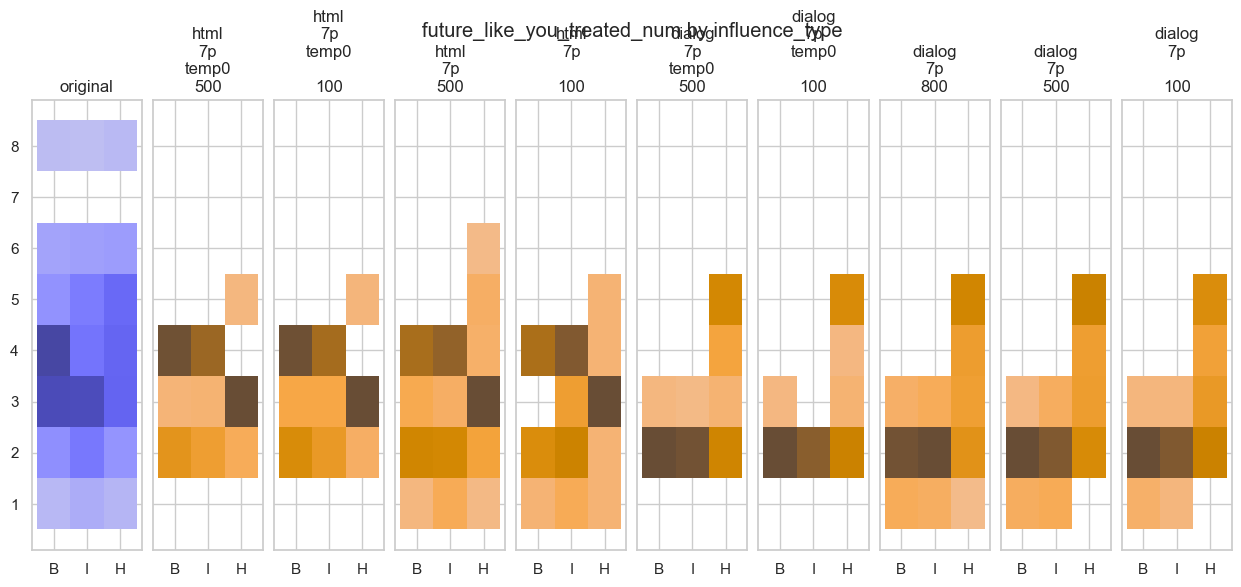

In [ ]:
histo_by_treatment_and_session(short_bot_and_orig_df, 'future_like_you_treated_num',type='PH')
histo_by_treatment_and_session(short_bot_and_orig_df, 'future_influence_society_treated_num',type='PH')
histo_by_treatment_and_session(short_bot_and_orig_df, 'influence_like_you_num',type='PH')
histo_by_treatment_and_session(short_bot_and_orig_df, 'influence_society_num',type='PH')


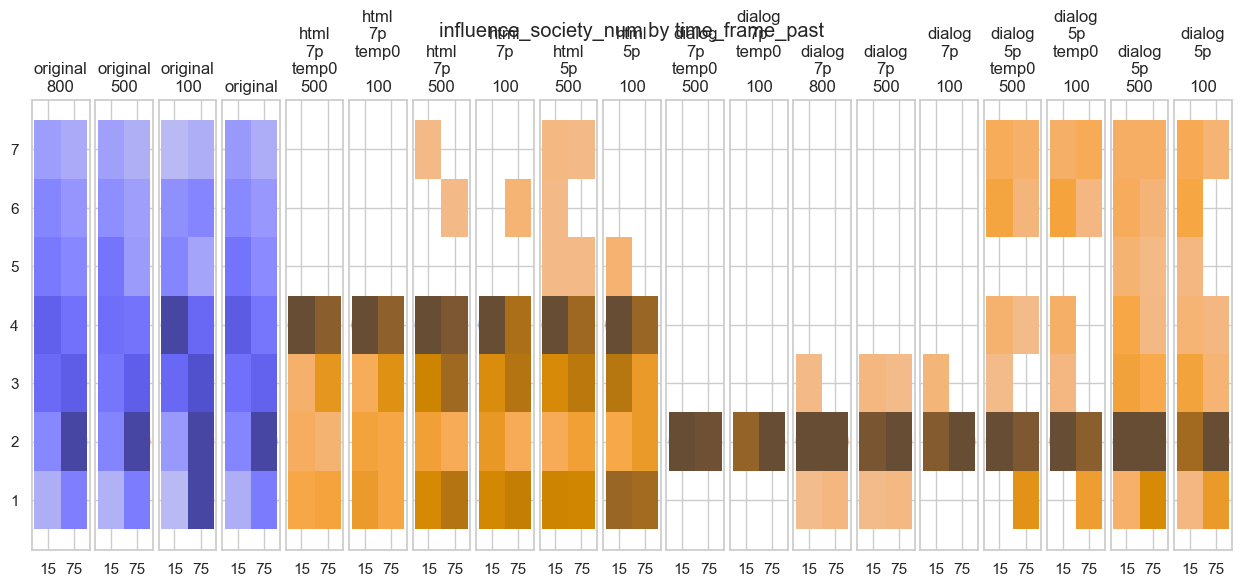

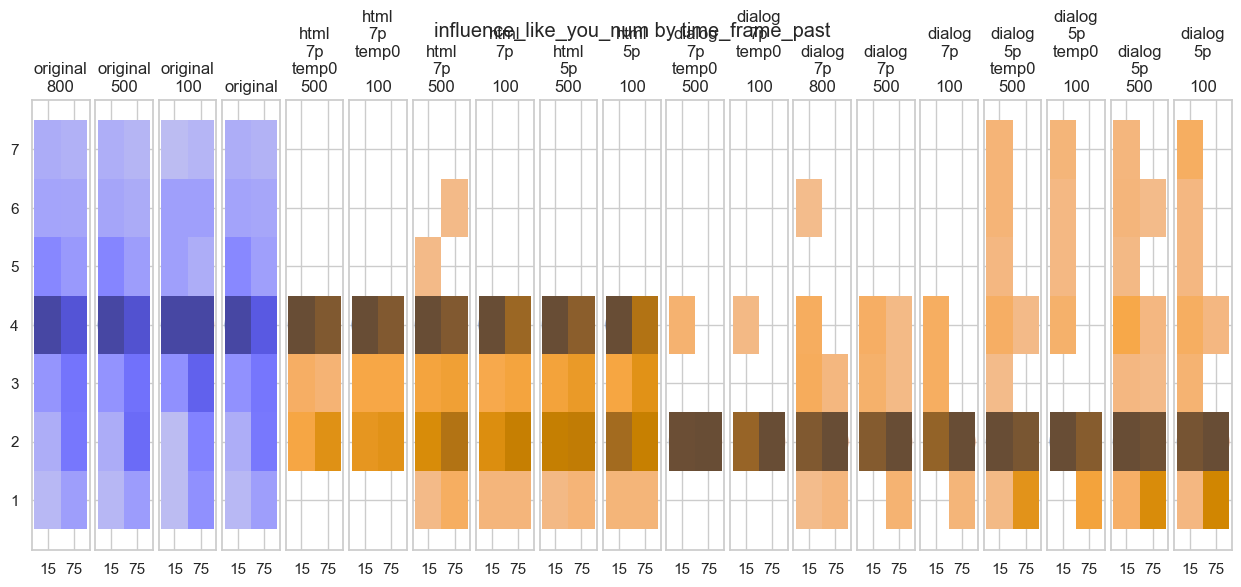

In [ ]:
histo_by_treatment_and_session(bot_and_orig_df, 'influence_society_num',treatment='time_frame_past',type='PH',order=['15','75'])
histo_by_treatment_and_session(bot_and_orig_df, 'influence_like_you_num',treatment='time_frame_past',type='PH',order=['15','75'])

In [ ]:
[c for c in bot_and_orig_df if 'infl' in c]

['influence_society',
 'influence_like_you',
 'future_influence_society',
 'influence_type',
 'future_influence_society_treated',
 'influence_society_num',
 'influence_society_rev',
 'influence_like_you_num',
 'influence_like_you_rev',
 'future_influence_society_num',
 'future_influence_society_rev',
 'future_influence_society_treated_num',
 'future_influence_society_treated_rev']

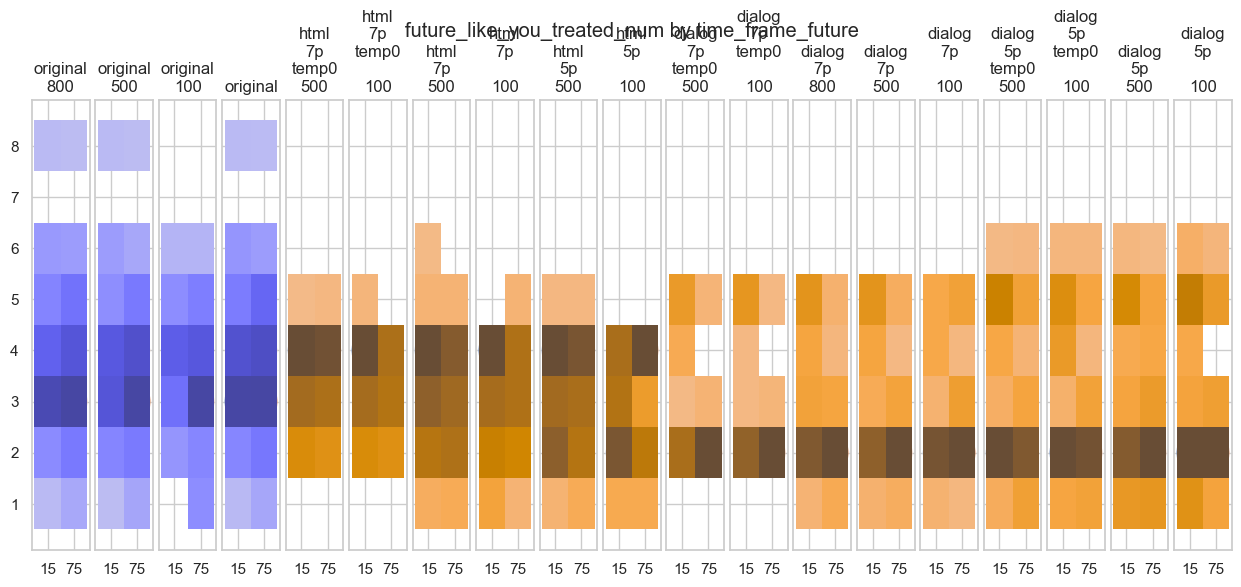

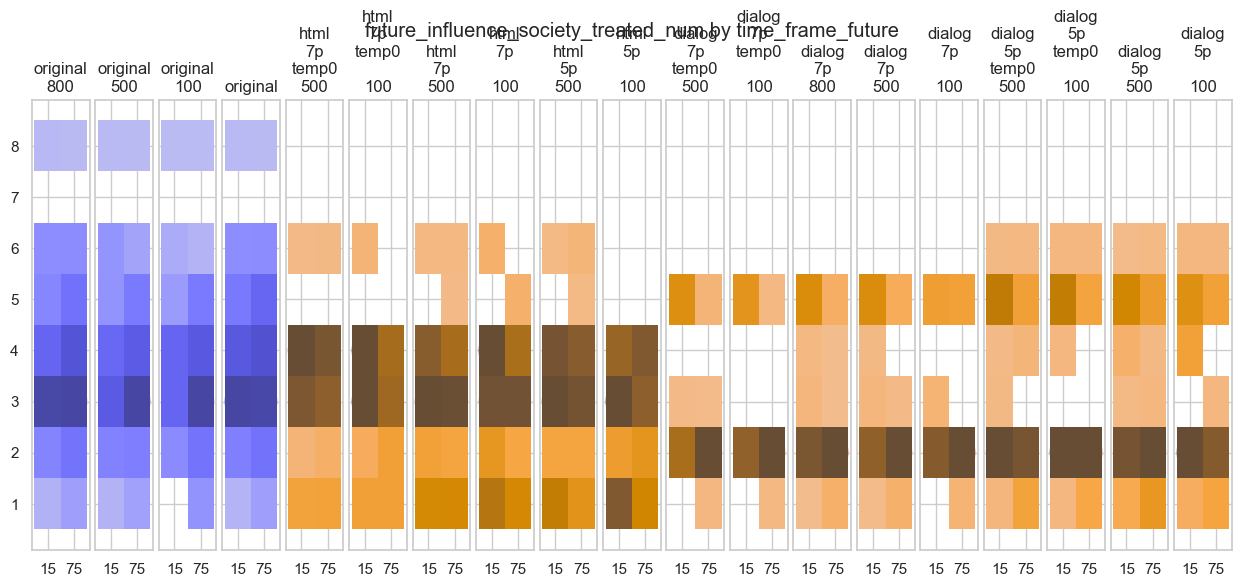

In [ ]:
histo_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num',treatment='time_frame_future',type='PH',order=['15','75'])
histo_by_treatment_and_session(bot_and_orig_df, 'future_influence_society_treated_num',treatment='time_frame_future',type='PH',order=['15','75'])

In [ ]:
cols_analyse= [
 'influence_society_num',
 'influence_like_you_num',
 'changes_num',
 'change_term_num',
 'change_selection_num',
 'change_size_num',
 'future_influence_society_treated_num',
 'future_like_you_treated_num']

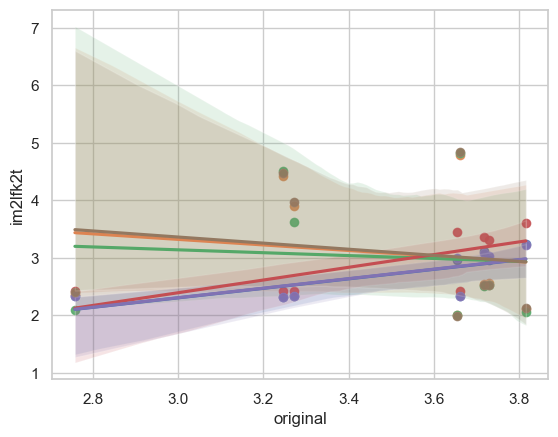

In [ ]:
def plt_reg_col(data,cols):
    cols_means=data.groupby('session.code').mean(numeric_only=True)[cols].transpose()
    for c in sessions :
        sns.scatterplot(y=c, x=cols_means["original"],
                        data=cols_means, 
                        alpha=.5)
        sns.regplot(data=cols_means, x= "original", y=c)
    plt.legend([],[], frameon=False)
    plt.savefig(figs_folder+"tmp"+str(len(cols))+".png", format="png", bbox_inches="tight")
    plt.show()
    
plt_reg_col(bot_and_orig_df,cols=cols_analyse)

<Axes: xlabel='change_term_num', ylabel='Count'>

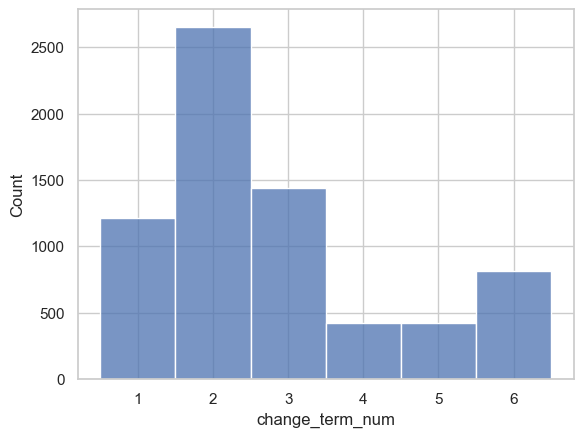

In [ ]:
sns.histplot(x=cols_analyse[3],data=bot_and_orig_df[~pd.isna(bot_and_orig_df[cols_analyse[3]])],discrete=(True, True),)

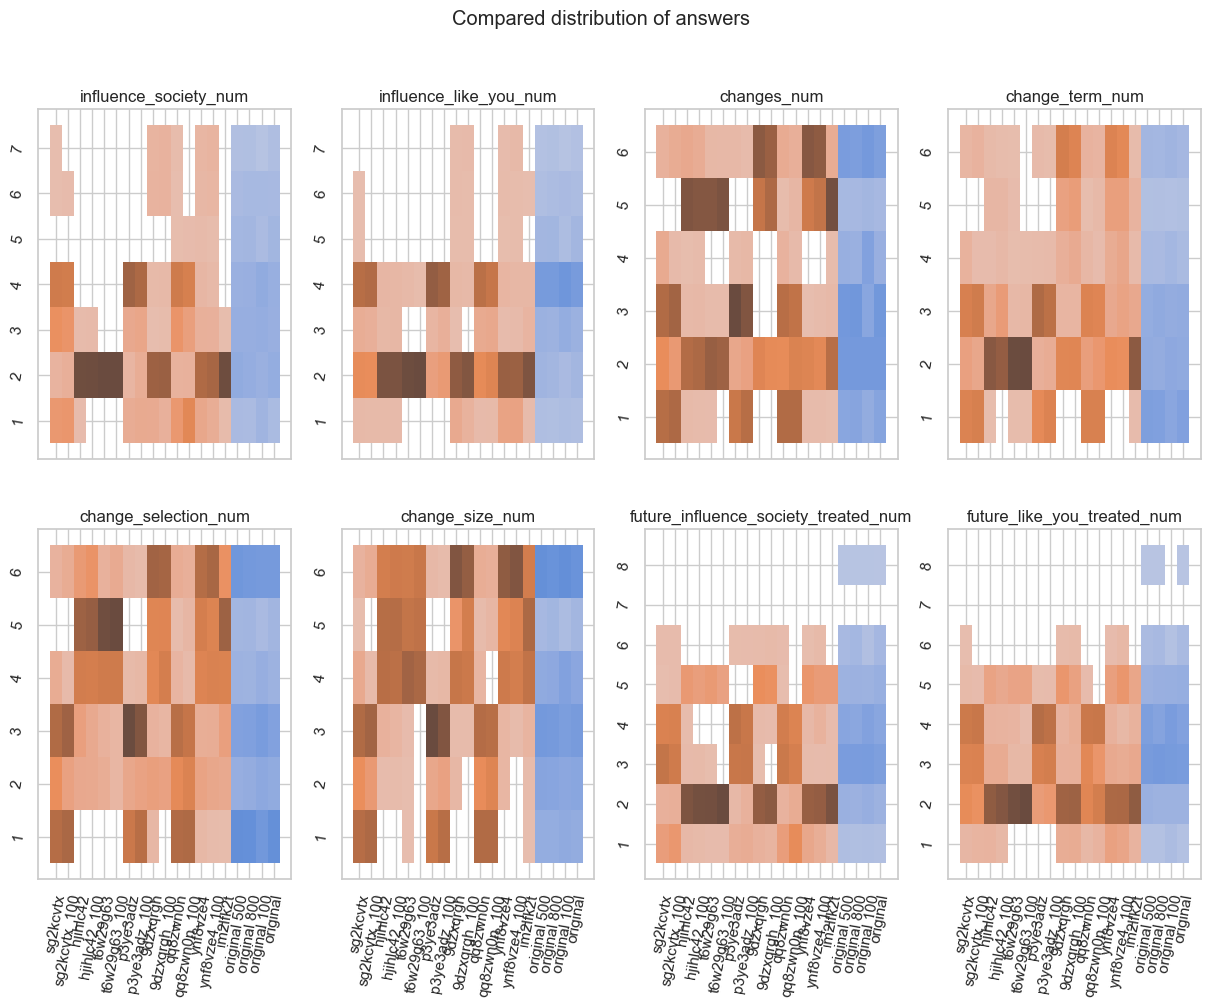

In [ ]:
def box_cols_by_session(data,cols=["future_influence_society_treated_num","future_like_you_treated_num"], nb_line = 4,type='PH'):

 
    n=len(cols)
    nb_by_line = n//nb_line
    fig, ax_tab = plt.subplots(nb_by_line, nb_line,sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle("Compared distribution of answers")
    sessions_nice_order = list(set(data['nice_session']))
    sessions_nice_order.sort(reverse=True)
    for i,c in enumerate(cols):

        ax=ax_tab[i//nb_line , i%nb_line ]
        if 'B' in type :
            sns.boxplot(x='nice_session',y= c,data=data ,ax=ax,order = sessions_nice_order)
        point_data= pd.crosstab(index=bot_and_orig_df[c],columns=bot_and_orig_df['nice_session'])

        if 'P' in type :
            sns.scatterplot(x="nice_session", y=c,size='session.code', 
                    data=bot_and_orig_df.groupby(['nice_session',c]).count().sort_index(ascending=False),sizes=(40,400), 
                    alpha=.5,hue="nice_session",ax=ax)
        if 'H' in type :
            groups = bot_and_orig_df[~pd.isna(bot_and_orig_df[c])].groupby("nice_session").count()
            bot_and_orig_df_w = bot_and_orig_df
            bot_and_orig_df_w['weight']=[1/groups[c][i] for i in bot_and_orig_df_w['nice_session']]
            sns.histplot(y=c,x='session.code',data=bot_and_orig_df_w[~pd.isna(bot_and_orig_df[c])],discrete=(True, True) ,
                         weights='weight',ax=ax,hue='_is_bot')
        ax.set_title(c)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.legend([],[], frameon=False)
        ax.tick_params(labelrotation=80)
    plt.savefig(figs_folder+"cols_by_sessions_col_"+str(len(cols))+".png", format="png", bbox_inches="tight")
    plt.show()
box_cols_by_session(bot_and_orig_df,cols=cols_analyse,type='H')


## check profile data

In [ ]:
col_prof = ['sex_num', 'educ_num', 'age',  'political_aff_num']

In [ ]:
original_df['sex_num']

0      2
1      1
2      1
3      2
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Name: sex_num, Length: 1000, dtype: int64

# check loop old 

In [ ]:
res_all_col = {}
res_all_col_tabs=[]
decode_profile_col_dict={'educ_num':{4:3,5:4,6:5}}

for i,l in all_app.iterrows()  :
        part_code = l['code_2']
        caseid = session_participant_dict[l['session.code']][part_code]
        l_orig = original_df[original_df['caseid']==caseid].iloc[0]
        for  c in col_prof :
            orig_value = l_orig[c]
            if c in decode_profile_col_dict :
                orig_value = decode_profile_col_dict[c].get(orig_value,orig_value) 
            if not(c in res_all_col) :
                res_all_col[c]=dict()
            
            d=res_all_col[c]
            s= l['session.code'] 
            if s not in d :
                  d[s] = {'good': 0 , 'zero': 0, 'diff':0}
            if l[c] == orig_value :
                d[s]['good'] += 1 
            elif  l[c] == 0 or pd.isna(l[c]):
                d[s]['zero'] += 1
            else :
                  d[s]['diff']+=1
            res_all_col[c] = d    
#                  d = {'good':sum(tab[s]==tab['orig_decode']), 'zero':sum(tab[s]==0), 'diff':sum(tab[s]!=tab['orig_decode']) - sum(tab[s]==0)}

pd.DataFrame.from_dict(res_all_col)

,sex_num,educ_num,age,political_aff_num
sg2kcvtx,"{'good': 430, 'zero': 68, 'diff': 2}","{'good': 432, 'zero': 68, 'diff': 0}","{'good': 432, 'zero': 68, 'diff': 0}","{'good': 428, 'zero': 68, 'diff': 4}"
sg2kcvtx_100,"{'good': 84, 'zero': 15, 'diff': 1}","{'good': 85, 'zero': 15, 'diff': 0}","{'good': 85, 'zero': 15, 'diff': 0}","{'good': 84, 'zero': 15, 'diff': 1}"
hjihlc42,"{'good': 484, 'zero': 16, 'diff': 0}","{'good': 484, 'zero': 16, 'diff': 0}","{'good': 484, 'zero': 16, 'diff': 0}","{'good': 482, 'zero': 16, 'diff': 2}"
hjihlc42_100,"{'good': 96, 'zero': 4, 'diff': 0}","{'good': 96, 'zero': 4, 'diff': 0}","{'good': 96, 'zero': 4, 'diff': 0}","{'good': 95, 'zero': 4, 'diff': 1}"
t6w29g63,"{'good': 498, 'zero': 2, 'diff': 0}","{'good': 498, 'zero': 2, 'diff': 0}","{'good': 498, 'zero': 2, 'diff': 0}","{'good': 498, 'zero': 2, 'diff': 0}"
t6w29g63_100,"{'good': 100, 'zero': 0, 'diff': 0}","{'good': 100, 'zero': 0, 'diff': 0}","{'good': 100, 'zero': 0, 'diff': 0}","{'good': 100, 'zero': 0, 'diff': 0}"
p3ye3adz,"{'good': 475, 'zero': 23, 'diff': 2}","{'good': 477, 'zero': 23, 'diff': 0}","{'good': 477, 'zero': 23, 'diff': 0}","{'good': 474, 'zero': 23, 'diff': 3}"
p3ye3adz_100,"{'good': 95, 'zero': 4, 'diff': 1}","{'good': 96, 'zero': 4, 'diff': 0}","{'good': 96, 'zero': 4, 'diff': 0}","{'good': 95, 'zero': 4, 'diff': 1}"
9dzxqrgh,"{'good': 0, 'zero': 500, 'diff': 0}","{'good': 0, 'zero': 500, 'diff': 0}","{'good': 0, 'zero': 500, 'diff': 0}","{'good': 0, 'zero': 500, 'diff': 0}"
9dzxqrgh_100,"{'good': 0, 'zero': 100, 'diff': 0}","{'good': 0, 'zero': 100, 'diff': 0}","{'good': 0, 'zero': 100, 'diff': 0}","{'good': 0, 'zero': 100, 'diff': 0}"


In [ ]:
pd.DataFrame.from_dict(res_all_col['educ_num']).transpose().to_html(figs_folder+'us_check_profile.html')

In [ ]:
pd.DataFrame.from_dict(res_all_col['sex_num']) / pd.DataFrame.from_dict(res_all_col['sex_num']).sum()

,sg2kcvtx,sg2kcvtx_100,hjihlc42,hjihlc42_100,t6w29g63,t6w29g63_100,p3ye3adz,p3ye3adz_100,9dzxqrgh,9dzxqrgh_100,qq8zwn0n,qq8zwn0n_100,ynf8vze4,ynf8vze4_100,im2lfk2t
good,0.860,0.84,0.968,0.96,0.996,1.0,0.950,0.95,0.0,0.0,0.756,0.80,0.0,0.0,0.95
zero,0.136,0.15,0.032,0.04,0.004,0.0,0.046,0.04,1.0,1.0,0.230,0.18,1.0,1.0,0.05
diff,0.004,0.01,0.000,0.00,0.000,0.0,0.004,0.01,0.0,0.0,0.014,0.02,0.0,0.0,0.00


In [ ]:
pd.DataFrame.from_dict(res_all_col['sex_num']) / pd.DataFrame.from_dict(res_all_col['sex_num']).sum()

,sg2kcvtx,sg2kcvtx_100,hjihlc42,hjihlc42_100,t6w29g63,t6w29g63_100,p3ye3adz,p3ye3adz_100,9dzxqrgh,9dzxqrgh_100,qq8zwn0n,qq8zwn0n_100,ynf8vze4,ynf8vze4_100,im2lfk2t
good,0.860,0.84,0.968,0.96,0.996,1.0,0.950,0.95,0.0,0.0,0.756,0.80,0.0,0.0,0.95
zero,0.136,0.15,0.032,0.04,0.004,0.0,0.046,0.04,1.0,1.0,0.230,0.18,1.0,1.0,0.05
diff,0.004,0.01,0.000,0.00,0.000,0.0,0.004,0.01,0.0,0.0,0.014,0.02,0.0,0.0,0.00


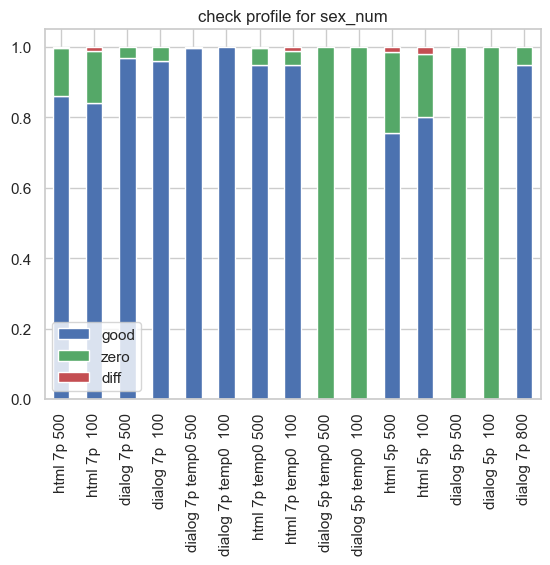

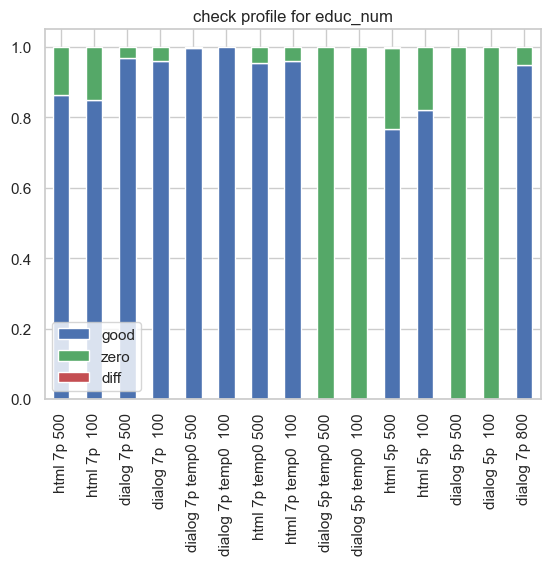

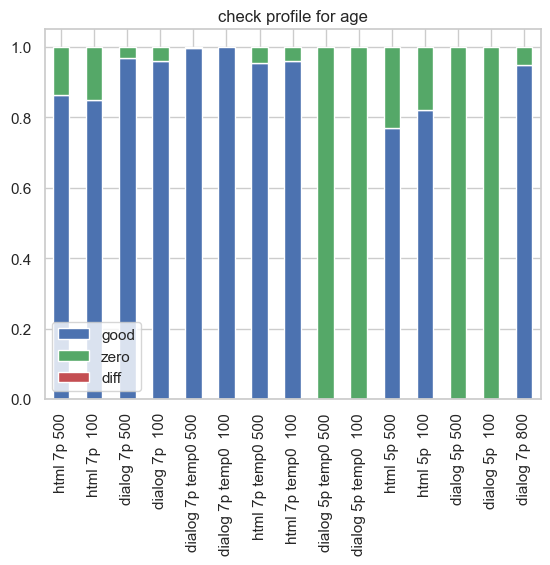

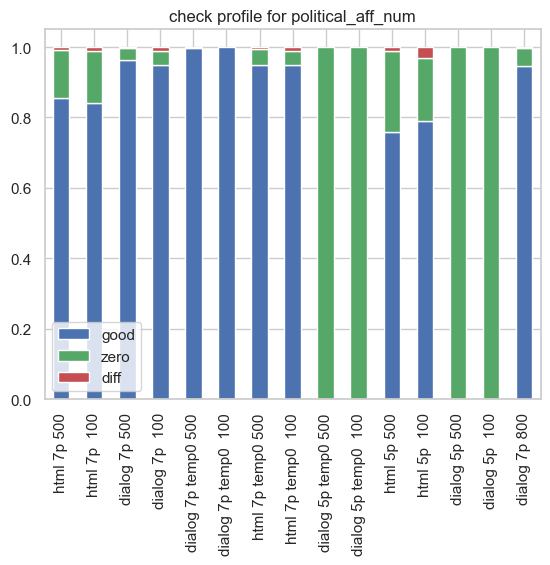

In [ ]:
for c in res_all_col:
    by_field=pd.DataFrame.from_dict(res_all_col[c]) / pd.DataFrame.from_dict(res_all_col[c]).sum()
    by_field.columns=[ nice_session_label(c) for c in by_field.columns]
    by_field.transpose().plot.bar(stacked=True,color=['b','g','r'])
    
    plt.title(f"check profile for {c}")
    save_plot('check_profiles_'+c)
    plt.show()


In [ ]:
res_pct={}   
for j,c in res_all_col.items() :
    resl={}
    for i,d in c.items() : 
        if d['good']+d['diff'] > 0 :
          resl[nice_session_label(i)] = d['good'] / ( d['good']+d['diff'])
    res_pct[j]=resl
pd.DataFrame.from_dict(res_pct)
            

,sex_num,educ_num,age,political_aff_num
html 7p 500,0.995370,1.000000,1.0,0.990741
html 7p 100,0.988235,1.000000,1.0,0.988235
dialog 7p 500,1.000000,1.000000,1.0,0.995868
dialog 7p 100,1.000000,1.000000,1.0,0.989583
dialog 7p temp0 500,1.000000,1.000000,1.0,1.000000
dialog 7p temp0 100,1.000000,1.000000,1.0,1.000000
html 7p temp0 500,0.995807,1.000000,1.0,0.993711
html 7p temp0 100,0.989583,1.000000,1.0,0.989583
html 5p 500,0.981818,0.997403,1.0,0.987013
html 5p 100,0.975610,1.000000,1.0,0.963415


<Axes: >

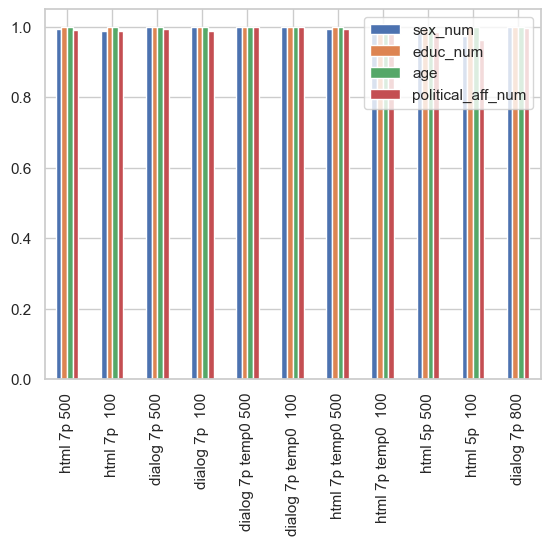

In [ ]:
pd.DataFrame.from_dict(res_pct).plot.bar()
            

In [ ]:
tab= pd.crosstab(index=all_app['id_in_session']-1, columns=all_app['session.code'],values=all_app['educ_num'],aggfunc='sum' )
tab['original']=original_df['educ_num']
tab.iloc[range(28,35)]

session.code,9dzxqrgh,9dzxqrgh_100,hjihlc42,hjihlc42_100,im2lfk2t,p3ye3adz,p3ye3adz_100,qq8zwn0n,qq8zwn0n_100,sg2kcvtx,sg2kcvtx_100,t6w29g63,t6w29g63_100,ynf8vze4,ynf8vze4_100,original
id_in_session,,,,,,,,,,,,,,,,
28,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5
29,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,3
30,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,5
31,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,6
32,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,3
33,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,5
34,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,6


In [ ]:
tab= pd.crosstab(index=all_app['id_in_session']-1, columns=all_app['session.code'],values=all_app['educ'],aggfunc='sum' )
tab['original']=ref_profile_df['educ']
tab.iloc[range(28,35)]

session.code,9dzxqrgh,9dzxqrgh_100,hjihlc42,hjihlc42_100,im2lfk2t,p3ye3adz,p3ye3adz_100,qq8zwn0n,qq8zwn0n_100,sg2kcvtx,sg2kcvtx_100,t6w29g63,t6w29g63_100,ynf8vze4,ynf8vze4_100,original
id_in_session,,,,,,,,,,,,,,,,
28,0,0,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,5-Post graduate degree,0,0,Post-grad
29,0,0,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,0,0,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,0,0,High school graduate
30,0,0,4-College graduate,4-College graduate,4-College graduate,0,0,0,0,4-College graduate,4-College graduate,4-College graduate,4-College graduate,0,0,4-year
31,0,0,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,0,0,4-year
32,0,0,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,0,0,2-High school graduate,2-High school graduate,2-High school graduate,2-High school graduate,0,0,High school graduate
33,0,0,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,4-College graduate,0,0,4-College graduate,4-College graduate,0,0,4-year
34,0,0,3-Some college,3-Some college,3-Some college,3-Some college,3-Some college,3-Some college,3-Some college,0,0,3-Some college,3-Some college,0,0,2-year


In [ ]:
c='educ'
educ_tab = pd.DataFrame.from_dict([[v[1],ref_profile_df['educ'][v[0]-1],
                                    original_df['educ_num'][v[0]-1],
                                    str(original_df['educ_num'][v[0]-1])+'-'+ ref_profile_df['educ'][v[0]-1]  ]
                                    for i,v in  all_app[['id_in_session',c] ].iterrows()])
educ_tab.columns=['bot','orig','orig_num','label']
educ_tab

,bot,orig,orig_num,label
0,5-Post graduate degree,Post-grad,6,6-Post-grad
1,None,High school graduate,3,3-High school graduate
2,3-Some college,2-year,4,4-2-year
3,None,Post-grad,6,6-Post-grad
4,4-College graduate,4-year,1,1-4-year
...,...,...,...,...
4995,5-Post graduate degree,Post-grad,3,3-Post-grad
4996,2-High school graduate,High school graduate,4,4-High school graduate
4997,None,4-year,5,5-4-year
4998,2-High school graduate,High school graduate,6,6-High school graduate


In [ ]:
import scipy.stats as stats

In [ ]:
d=original_df 
f,p=stats.f_oneway(d[d['influence_type']=='B']['future_like_you_treated_num'].dropna(),d[d['influence_type']=='H']['future_like_you_treated_num'].dropna())
mean_B= d[d['influence_type']=='B']['future_like_you_treated_num'].dropna().mean()
mean_H= d[d['influence_type']=='H']['future_like_you_treated_num'].dropna().mean()

res1={'F':f,'p':p,'mean B':mean_B,
                            'mean H':mean_H,'diff':mean_H-mean_B}
res1

{'F': 5.654797673338457,
 'p': 0.017691863161013666,
 'mean B': 3.6869565217391305,
 'mean H': 3.9367088607594938,
 'diff': 0.2497523390203633}

In [ ]:
stats.f_oneway(original_df[original_df['influence_type']=='B']['future_like_you_treated_num'], original_df[original_df['influence_type']=='I']['future_like_you_treated_num'])

F_onewayResult(statistic=1.809802684484551, pvalue=0.17897902868271995)

In [ ]:
stats.f_oneway(original_df[original_df['influence_type']=='B']['future_like_you_treated_num'], original_df[original_df['influence_type']=='H']['future_like_you_treated_num'])

F_onewayResult(statistic=5.654797673338457, pvalue=0.017691863161013666)

In [ ]:
F,p = stats.f_oneway(all_app[all_app['influence_type']=='B']['future_like_you_treated_num'].dropna(),all_app[all_app['influence_type']=='H']['future_like_you_treated_num'].dropna(),all_app[all_app['influence_type']=='I']['future_like_you_treated_num'].dropna())

In [ ]:
def f_test_couple(treatment_col,target_col,data,s):
    d=data[data['session.code']==s]
    values = list(set(d[treatment_col]))
    fp=list()
    for i1,v1 in enumerate(values):
        for v2 in values[i1+1:] :
            f,p=stats.f_oneway(d[d[treatment_col]==v1][target_col].dropna(),
                        d[d[treatment_col]==v2][target_col].dropna())
                               
            mean_1= d[d[treatment_col]==v1][target_col].dropna().mean()
            mean_2= d[d[treatment_col]==v2][target_col].dropna().mean()
            
            fp.append({'v1':v1,'v2':v2,'session':nice_session_label(s),'F':round(f,2),'p':round(p,5),
                       'mean 1':mean_1,'mean 2':mean_2,'diff':mean_2-mean_1})
    
    return fp


In [ ]:
res=[]
for s in set(bot_and_orig_df['session.code']):
    if s in old_sessions_dict or 'origin' in s :
        d=bot_and_orig_df[bot_and_orig_df['session.code']==s]
        #f,p=stats.f_oneway(d[d['influence_type']=='B']['future_like_you_treated_num'].dropna(),d[d['influence_type']=='H']['future_like_you_treated_num'].dropna())
        fps = f_test_couple(treatment_col='influence_type',target_col='future_like_you_treated_num',data=bot_and_orig_df,s=s)
        
        res=res +fps

res_tab= pd.DataFrame.from_dict(res).set_index(['v1','v2','session']).sort_index()

res_tab

F        p    mean 1    mean 2      diff
v1 v2 session                                                           
H  B  dialog 5p 500        312.27  0.00000  3.861842  1.916201 -1.945641
      dialog 5p temp0 500  292.23  0.00000  4.050000  2.051724 -1.998276
      dialog 7p 500        266.26  0.00000  3.610465  1.943750 -1.666715
      dialog 7p 800        415.80  0.00000  3.651639  1.980000 -1.671639
      dialog 7p temp0 500  200.49  0.00000  3.509091  2.028902 -1.480189
      html 5p 500            9.69  0.00209  2.907407  3.250000  0.342593
      html 7p 500            1.11  0.29362  3.043165  3.154472  0.111306
      html 7p temp0 500     56.36  0.00000  2.973154  3.538462  0.565307
      original               5.65  0.01769  3.936709  3.686957 -0.249752
      original 100           1.97  0.16601  3.870968  3.464286 -0.406682
      original 500           6.19  0.01336  3.907285  3.541667 -0.365618
      original 800           6.14  0.01350  3.922131  3.627660 -0.294472
I  B  dialog 5p 500          4.73  0.03024  2.112426  1.916201 -0.196225
      dialog 5p temp0 500    0.85  0.35834  2.132530  2.051724 -0.080806
      dialog 7p 500          1.10  0.29573  1.986755  1.943750 -0.043005
      dialog 7p 800          0.85  0.35579  2.011278  1.980000 -0.031278
      dialog 7p temp0 500    1.08  0.29865  2.012500  2.028902  0.016402
      html 5p 500            2.45  0.11845  3.047619  3.250000  0.202381
      html 7p 500            0.01  0.94053  3.144928  3.154472  0.009544
      html 7p temp0 500      0.02  0.89440  3.551181  3.538462 -0.012720
      original               1.81  0.17898  3.548673  3.686957  0.138284
      original 100           1.37  0.24595  3.121951  3.464286  0.342334
      original 500           0.05  0.81626  3.508287  3.541667  0.033379
      original 800           0.49  0.48440  3.547445  3.627660  0.080214
   H  dialog 5p 500        209.48  0.00000  2.112426  3.861842  1.749416
      dialog 5p temp0 500  276.76  0.00000  2.132530  4.050000  1.917470
      dialog 7p 500        229.22  0.00000  1.986755  3.610465  1.623710
      dialog 7p 800        423.92  0.00000  2.011278  3.651639  1.640361
      dialog 7p temp0 500  191.29  0.00000  2.012500  3.509091  1.496591
      html 5p 500            1.47  0.22703  3.047619  2.907407 -0.140212
      html 7p 500            0.86  0.35406  3.144928  3.043165 -0.101762
      html 7p temp0 500     57.42  0.00000  3.551181  2.973154 -0.578027
      original              12.01  0.00056  3.548673  3.936709  0.388036
      original 100           5.98  0.01696  3.121951  3.870968  0.749017
      original 500           6.25  0.01290  3.508287  3.907285  0.398997
      original 800           8.63  0.00345  3.547445  3.922131  0.374686

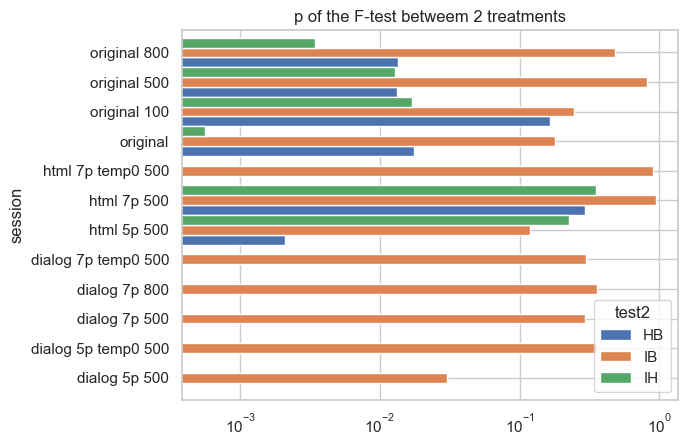

In [ ]:
t1= pd.DataFrame.from_dict(res)
t1['orig']=['orig' in s for s in t1.session]
t1['test2']=t1['v1']+t1['v2']
pd.crosstab(index=t1['test2'], columns=t1['session'],values=t1['p'],aggfunc='mean').transpose().plot.barh(width=1,log=True,)

plt.title('p of the F-test betweem 2 treatments')
plt.savefig(figs_folder+"f_test_p.png", format="png", bbox_inches="tight")


In [ ]:
t1

,v1,v2,session,F,p,mean 1,mean 2,diff,orig,test2
0,I,H,html 7p temp0 500,57.42,0.00000,3.551181,2.973154,-0.578027,False,IH
1,I,B,html 7p temp0 500,0.02,0.89440,3.551181,3.538462,-0.012720,False,IB
2,H,B,html 7p temp0 500,56.36,0.00000,2.973154,3.538462,0.565307,False,HB
3,I,H,original,12.01,0.00056,3.548673,3.936709,0.388036,True,IH
4,I,B,original,1.81,0.17898,3.548673,3.686957,0.138284,True,IB
5,H,B,original,5.65,0.01769,3.936709,3.686957,-0.249752,True,HB
6,I,H,original 100,5.98,0.01696,3.121951,3.870968,0.749017,True,IH
7,I,B,original 100,1.37,0.24595,3.121951,3.464286,0.342334,True,IB
8,H,B,original 100,1.97,0.16601,3.870968,3.464286,-0.406682,True,HB
9,I,H,html 7p 500,0.86,0.35406,3.144928,3.043165,-0.101762,False,IH


<Axes: xlabel='test2', ylabel='session'>

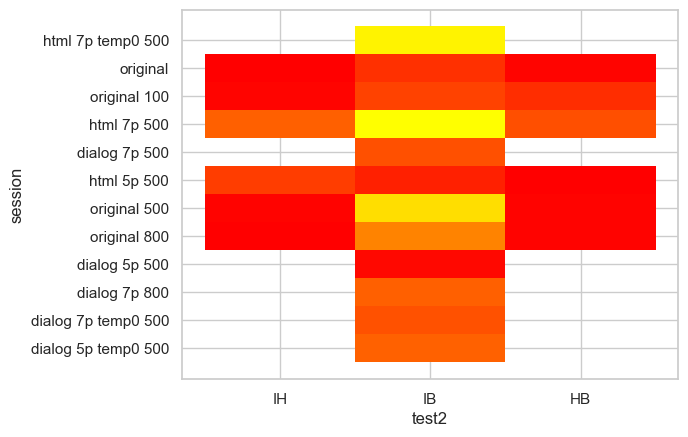

In [ ]:
sns.histplot(x='test2',y='session',data=t1,discrete=(True, True) ,
                         weights='p',cmap='autumn')

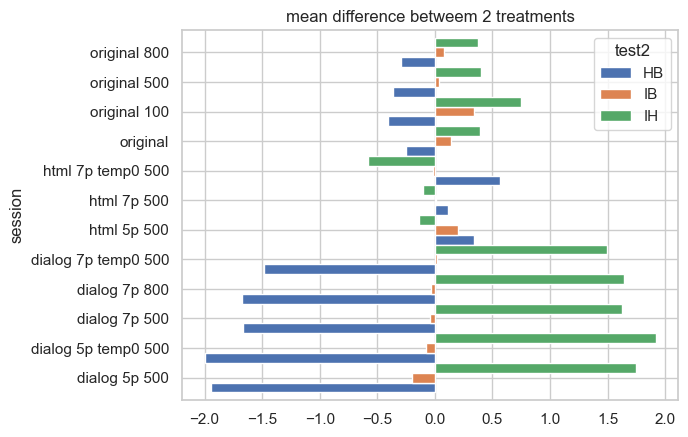

In [ ]:
t1= pd.DataFrame.from_dict(res)
t1['test2']=t1['v1']+t1['v2']
pd.crosstab(index=t1['test2'], columns=t1['session'],values=t1['diff'],aggfunc='mean').transpose().plot.barh(width=1)
plt.title('mean difference betweem 2 treatments')
plt.savefig(figs_folder+"f_test_diff.png", format="png", bbox_inches="tight")

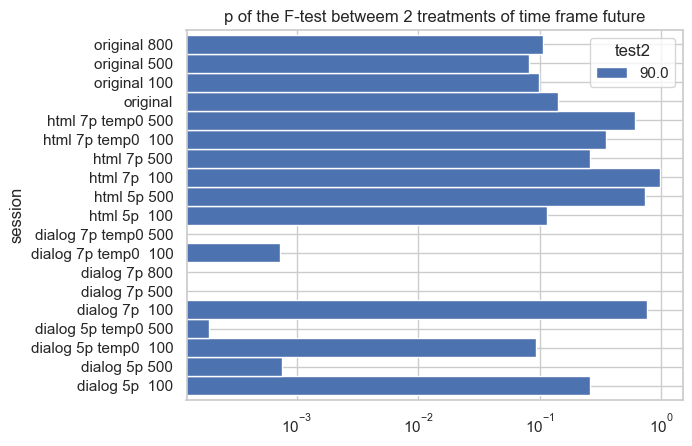

In [ ]:
res=[]
for s in set(bot_and_orig_df['session.code']):
    d=bot_and_orig_df[bot_and_orig_df['session.code']==s]
    #f,p=stats.f_oneway(d[d['influence_type']=='B']['future_like_you_treated_num'].dropna(),d[d['influence_type']=='H']['future_like_you_treated_num'].dropna())
    fps = f_test_couple(treatment_col='time_frame_future',target_col='future_like_you_treated_num',data=bot_and_orig_df,s=s)
    
    res=res +fps

res_tab= pd.DataFrame.from_dict(res).set_index(['v1','v2','session']).sort_index()

t1= pd.DataFrame.from_dict(res)
t1['orig']=['orig' in s for s in t1.session]
t1['test2']=t1['v1']+t1['v2']
pd.crosstab(index=t1['test2'], columns=t1['session'],values=t1['p'],aggfunc='mean').transpose().plot.barh(width=1,log=True)

plt.title('p of the F-test betweem 2 treatments of time frame future')
plt.savefig(figs_folder+"f_test_p_time_future.png", format="png", bbox_inches="tight")

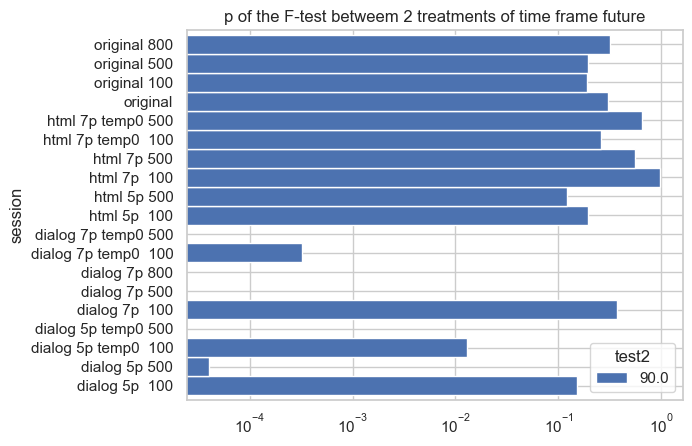

In [ ]:
res=[]
for s in set(bot_and_orig_df['session.code']):
    d=bot_and_orig_df[bot_and_orig_df['session.code']==s]
    #f,p=stats.f_oneway(d[d['influence_type']=='B']['future_like_you_treated_num'].dropna(),d[d['influence_type']=='H']['future_like_you_treated_num'].dropna())
    fps = f_test_couple(treatment_col='time_frame_future',target_col='future_influence_society_treated_num',data=bot_and_orig_df,s=s)
    
    res=res +fps

res_tab= pd.DataFrame.from_dict(res).set_index(['v1','v2','session']).sort_index()

t1= pd.DataFrame.from_dict(res)
t1['orig']=['orig' in s for s in t1.session]
t1['test2']=t1['v1']+t1['v2']
pd.crosstab(index=t1['test2'], columns=t1['session'],values=t1['p'],aggfunc='mean').transpose().plot.barh(width=1,log=True)

plt.title('p of the F-test betweem 2 treatments of time frame future')
plt.savefig(figs_folder+"f_test_p_time_future.png", format="png", bbox_inches="tight")

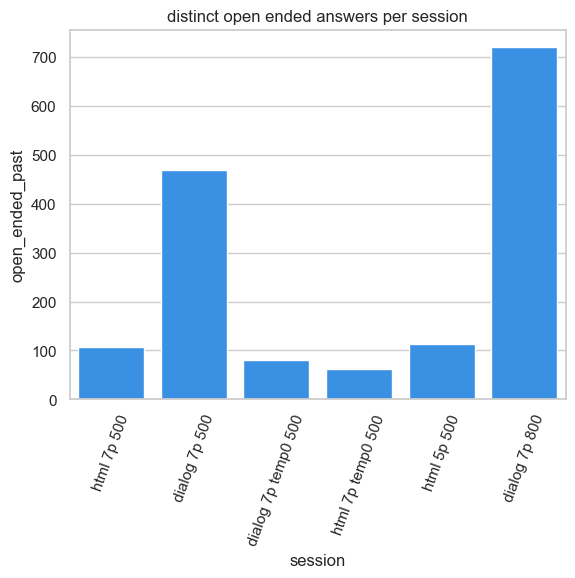

In [ ]:
open_ended_analysis = pd.DataFrame.from_dict([ {"session":nice_session_label(s), "open_ended_past":len(set(all_app[all_app['session.code']==s]['open_ended_past'])),
                                                "n" : len(all_app[all_app['session.code']==s]),
                                                "open_ended_future":len(set(all_app[all_app['session.code']==s]['open_ended_future'])),'original':'origin' in s } for s in sessions])
open_ended_analysis["open_ended_future_dist"]= open_ended_analysis["open_ended_future"]/open_ended_analysis["n"]
open_ended_analysis["open_ended_past_dist"]= open_ended_analysis["open_ended_past"]/open_ended_analysis["n"]

plt.xticks(rotation=70)
sns.barplot(data=open_ended_analysis,y='open_ended_past',x='session',color='dodgerblue')
plt.title('distinct open ended answers per session')

plt.savefig(figs_folder+"open_ended_per_session.png",bbox_inches='tight')

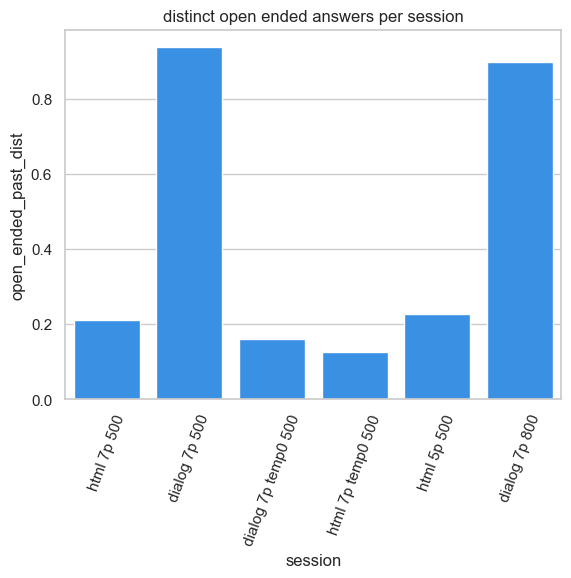

In [ ]:
plt.xticks(rotation=70)
sns.barplot(data=open_ended_analysis,y='open_ended_past_dist',x='session',color='dodgerblue')
plt.title('distinct open ended answers per session')

plt.savefig(figs_folder+"open_ended_per_session_dist.png",bbox_inches='tight')

In [ ]:
list(all_app['open_ended_future'][0:13])

['',
 None,
 '',
 None,
 'The most important influence that the court will have over this period is to continue safeguarding individual rights and promoting equality.',
 None,
 '',
 'The most important influence that the court will have over this period is upholding individual rights and promoting equality.',
 '',
 None,
 '',
 None,
 '']